# Part I - Solar Augmentation Potential of Fossil Fuel Plants across the Southern, Western and Central US
## by (Dario Bilardello

## Introduction

The datasets, downloaded from Geothermal Prospector at https://maps.nrel.gov/?da=geothermal-prospector, are the results of a joint study between NREL and the Electric Power Research Institute (EPRI) to integrate solar thermal energy into existing or planned coal-fired and natural gas combined cycle (NGCC) plants. The study ranked the solar-augment potential for fossil plants throughout 22 states in the southeast, southwest, northwest and central United States.

From the original study, each plant was ranked based on a number of factors (age of the plant, the average capacity factor, the solar resource available, available land surrounding the plant, topography of that land, and the expected solar-use efficiency), and were qualitatively scored as: Not Considered, Excellent, Good, or Fair.

Separate analysis was performed for parabolic trough and power tower solar augmentation technologies due to the difference in the steam temperatures that each can generate, with power towers offering more capacity and higher quality integration due to the greater steam temperatures that can be achieved.

Solar-augment of existing power plants potentially offers a lower cost and lower risk alternative to stand-alone solar plant construction. Based on this and prior EPRI analyses, the best economics occur with the offset of duct firing when augmenting NGCC plants; while the greatest reduction in air pollutants is achieved through the augment of coal plants. The NREL report on Solar-Augment Potential of U.S. Fossil-Fired Power Plants is available at https://www.nrel.gov/docs/fy11osti/50597.pdf

Here, I analyze the available data further, validating the results from the previous study, but identifying the specific plants across the states that have the best augmentation potential, separated by energy source type (coal or natural gas). Note that the original study never distinguished the specific energy source that yield the highest augmentation potential.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Importing datasets
coal= pd.read_csv('Coal_Plants.csv')
gas= pd.read_csv('NGCC_Plants.csv')

In [3]:
# Visual inspection of coal plant data
print(coal.shape)
coal.head(3)

(206, 14)


,Site Name,Power Plant Type,Plant Status,State,Lat,Lon,Plant Owner,Plant Operator,Nameplate Capacity (MW),Planned Capacity (MW),Max Tower Capacity (MWe),Max Trough Capacity (MWe),Solar-Augment Potential,Reason Not Considered
0,TS Power Plant,Pulverized Coal,Operating,NV,40.6422,-116.9370,Newmont Nevada Energy Investment LLC,Newmont Nevada Energy Investment LLC,220.0,NaN,64.7,16.4,Good,NaN
1,Desert Rock,Pulverized Coal,Planned,NM,36.5435,-108.2235,Multi-Owned,(blank),0.0,1500.0,169.2,111.6,Good,NaN
2,Oak Grove Project,Pulverized Coal,Operating,TX,31.0494,-96.4813,Luminant Generation Company LLC,Luminant Generation Company LLC,944.0,803.0,484.4,140.4,Good,NaN


In [4]:
# Visual inspection of natural gas plant data
print(gas.shape)
gas.head(3)

(427, 14)


,Site Name,Power Plant Type,Plant Status,State,Lat,Lon,Plant Owner,Plant Operator,Nameplate Capacity (MW),Planned Capacity (MW),Max Tower Capacity (MWe),Max Trough Capacity (MWe),Solar-Augment Potential,Reason Not Considered
0,Afton,Natural Gas Combined Cycle,Operating,NM,32.1134,-106.8480,Public Service Company of New Mexico,Public Service Company of New Mexico,287.0,NaN,20.9,18.7,Excellent,NaN
1,Allen,Natural Gas Combined Cycle,Under Construction,NV,36.4250,-114.9000,Nevada Power Company,Nevada Power Company,0.0,576.0,42.6,38.4,Excellent,NaN
2,Apex Industrial Park,Natural Gas Combined Cycle,Operating,NV,36.4178,-114.9622,"Broadway Generating Company, LLC","Las Vegas Power Company, LLC",600.6,NaN,75.2,63.8,Excellent,NaN


In [5]:
# Creating new variable column with simplified value names
coal['Type'] = 'Coal'
gas['Type'] = 'Natural Gas'

In [6]:
# Joining the two datasets vertically (all headers are the same)
plants = pd.concat([coal, gas], ignore_index=True)
plants.shape
plants.head(3)

,Site Name,Power Plant Type,Plant Status,State,Lat,Lon,Plant Owner,Plant Operator,Nameplate Capacity (MW),Planned Capacity (MW),Max Tower Capacity (MWe),Max Trough Capacity (MWe),Solar-Augment Potential,Reason Not Considered,Type
0,TS Power Plant,Pulverized Coal,Operating,NV,40.6422,-116.9370,Newmont Nevada Energy Investment LLC,Newmont Nevada Energy Investment LLC,220.0,NaN,64.7,16.4,Good,NaN,Coal
1,Desert Rock,Pulverized Coal,Planned,NM,36.5435,-108.2235,Multi-Owned,(blank),0.0,1500.0,169.2,111.6,Good,NaN,Coal
2,Oak Grove Project,Pulverized Coal,Operating,TX,31.0494,-96.4813,Luminant Generation Company LLC,Luminant Generation Company LLC,944.0,803.0,484.4,140.4,Good,NaN,Coal


In [7]:
# Combine Nameplate and Planned Capacity columns, only taking PC if NC is zero (for plants not yet in function)
plants['Capacity (MW)'] = np.where(
    plants['Nameplate Capacity (MW)'] == 0.0, 
    plants['Planned Capacity (MW)'], 
    plants['Nameplate Capacity (MW)']
)

plants.head(3)

,Site Name,Power Plant Type,Plant Status,State,Lat,Lon,Plant Owner,Plant Operator,Nameplate Capacity (MW),Planned Capacity (MW),Max Tower Capacity (MWe),Max Trough Capacity (MWe),Solar-Augment Potential,Reason Not Considered,Type,Capacity (MW)
0,TS Power Plant,Pulverized Coal,Operating,NV,40.6422,-116.9370,Newmont Nevada Energy Investment LLC,Newmont Nevada Energy Investment LLC,220.0,NaN,64.7,16.4,Good,NaN,Coal,220.0
1,Desert Rock,Pulverized Coal,Planned,NM,36.5435,-108.2235,Multi-Owned,(blank),0.0,1500.0,169.2,111.6,Good,NaN,Coal,1500.0
2,Oak Grove Project,Pulverized Coal,Operating,TX,31.0494,-96.4813,Luminant Generation Company LLC,Luminant Generation Company LLC,944.0,803.0,484.4,140.4,Good,NaN,Coal,944.0


In [8]:
# Removing columns I don't need
plants = plants.drop(columns=['Power Plant Type', 'Plant Status', 'Plant Owner', 'Plant Operator',
                              'Nameplate Capacity (MW)', 'Planned Capacity (MW)', 'Reason Not Considered'])


# Rename column name with extra space that yielded problems
plants = plants.rename(columns={'Max Tower  Capacity (MWe)': 'Max Tower Capacity (MWe)'})


In [9]:
# Inspecting modified dataframe visually (and shape programmatically)
print(plants.shape)
plants.head(3)

(633, 9)


,Site Name,State,Lat,Lon,Max Tower Capacity (MWe),Max Trough Capacity (MWe),Solar-Augment Potential,Type,Capacity (MW)
0,TS Power Plant,NV,40.6422,-116.9370,64.7,16.4,Good,Coal,220.0
1,Desert Rock,NM,36.5435,-108.2235,169.2,111.6,Good,Coal,1500.0
2,Oak Grove Project,TX,31.0494,-96.4813,484.4,140.4,Good,Coal,944.0


In [10]:
# Inspecting dataframe programmatically
plants.info()
plants.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Site Name                  633 non-null    object 
 1   State                      633 non-null    object 
 2   Lat                        633 non-null    float64
 3   Lon                        633 non-null    float64
 4   Max Tower Capacity (MWe)   633 non-null    float64
 5   Max Trough Capacity (MWe)  633 non-null    float64
 6   Solar-Augment Potential    633 non-null    object 
 7   Type                       633 non-null    object 
 8   Capacity (MW)              633 non-null    float64
dtypes: float64(5), object(4)
memory usage: 44.6+ KB


,Lat,Lon,Max Tower Capacity (MWe),Max Trough Capacity (MWe),Capacity (MW)
count,633.000000,633.000000,633.000000,633.000000,633.000000
mean,34.135720,-98.750998,39.321169,20.400632,612.495592
std,3.986088,13.658580,77.973829,37.838551,595.279390
min,25.435600,-123.171700,0.000000,0.000000,1.000000
25%,31.250400,-111.751000,0.000000,0.000000,147.000000
50%,33.875900,-96.560000,0.000000,0.000000,513.700000
75%,36.436400,-86.869400,41.900000,27.200000,801.200000
max,47.786100,-76.986952,511.600000,283.200000,3564.000000


In [11]:
# Convert relevant columns to categorical data types 
plants['Solar-Augment Potential'] = pd.Categorical(plants['Solar-Augment Potential'])
plants['Type'] = pd.Categorical(plants['Type'])
plants['State'] = pd.Categorical(plants['State'])

In [12]:
# Verify data type change
plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Site Name                  633 non-null    object  
 1   State                      633 non-null    category
 2   Lat                        633 non-null    float64 
 3   Lon                        633 non-null    float64 
 4   Max Tower Capacity (MWe)   633 non-null    float64 
 5   Max Trough Capacity (MWe)  633 non-null    float64 
 6   Solar-Augment Potential    633 non-null    category
 7   Type                       633 non-null    category
 8   Capacity (MW)              633 non-null    float64 
dtypes: category(3), float64(5), object(1)
memory usage: 32.7+ KB


In [13]:
# Inspecting for null values
print(plants.isnull().sum())

Site Name                    0
State                        0
Lat                          0
Lon                          0
Max Tower Capacity (MWe)     0
Max Trough Capacity (MWe)    0
Solar-Augment Potential      0
Type                         0
Capacity (MW)                0
dtype: int64


In [14]:
# Verifying the states used in the study
plants['State'].unique()

['NV', 'NM', 'TX', 'CA', 'GA', ..., 'AR', 'NE', 'OR', 'WY', 'ID']
Length: 22
Categories (22, object): ['AL', 'AR', 'AZ', 'CA', ..., 'TN', 'TX', 'UT', 'WY']

In [15]:
# Saving the merged and cleaned dataframe as a CSV file
plants.to_csv("merged_plants_data.csv", index=False)

### What is the structure of your dataset?

The two original sets were of 206 and 427 rows by 14 columns, which I combined and cleaned to a new 633 row by 9 column dataframe. The dataframe contains location data in lat-long, three numberical variables (Power Capacity, Solar Tower technology augmentation Capacity and Solar Trough technorolgy augmentation Capacity), and three categorical variables (State, Solar Augmentation Potential rank, and source Type (coal or natural gas)).

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are the capacities of both coal and natural gas plants, as well as the solar augmentation capacities that could be brought about by the two different technology, power tower and parabolic trough.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Particularly useful to determine which plants per state, and for which fossil fuel energy source, I would consider investing on, are the augmentation rankings of the plants based on a number of external factors.

## Univariate Exploration

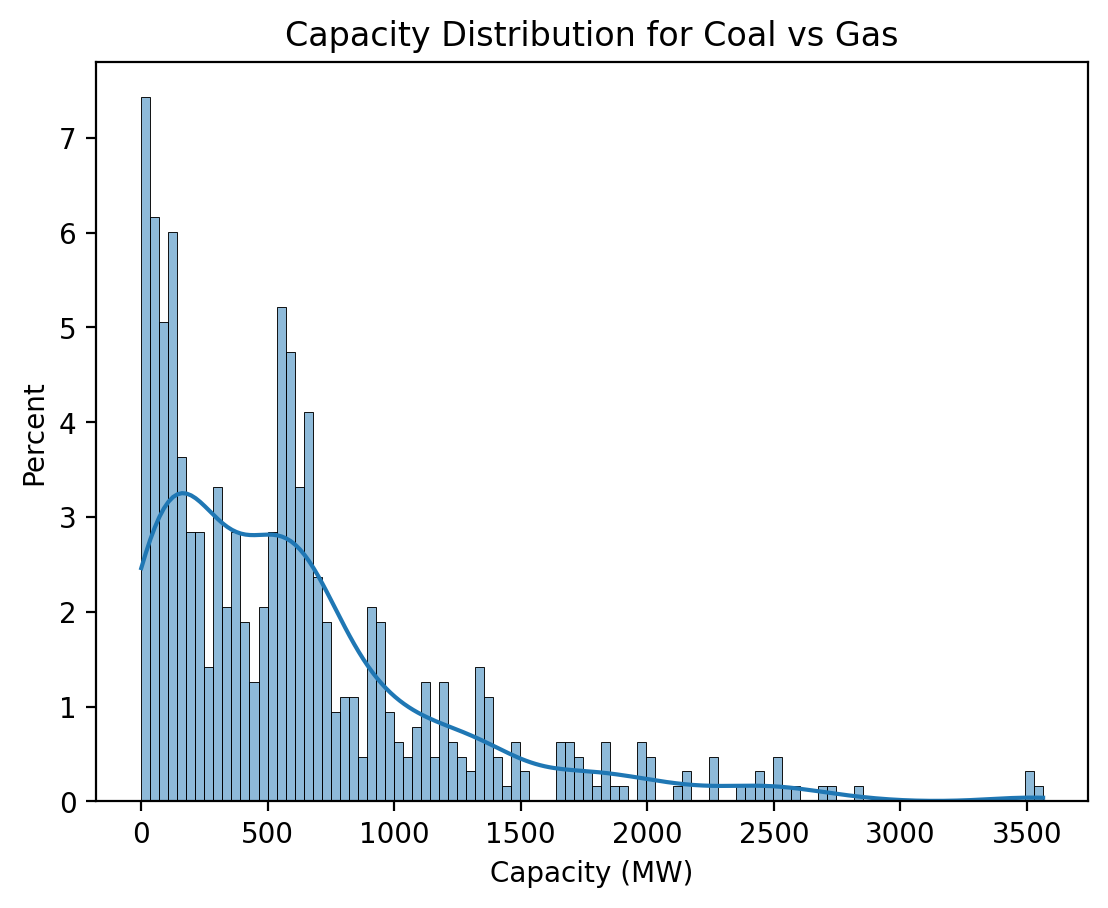

In [16]:
# Plot histogram for 'Capacity (MW)'
sns.histplot(data=plants, x='Capacity (MW)', stat='percent', kde=True, bins=100)
plt.title('Capacity Distribution for Coal vs Gas')
plt.show()

Overall distributon of plant output capacities in MW, for combined coal and natural gas expressed as percentage.

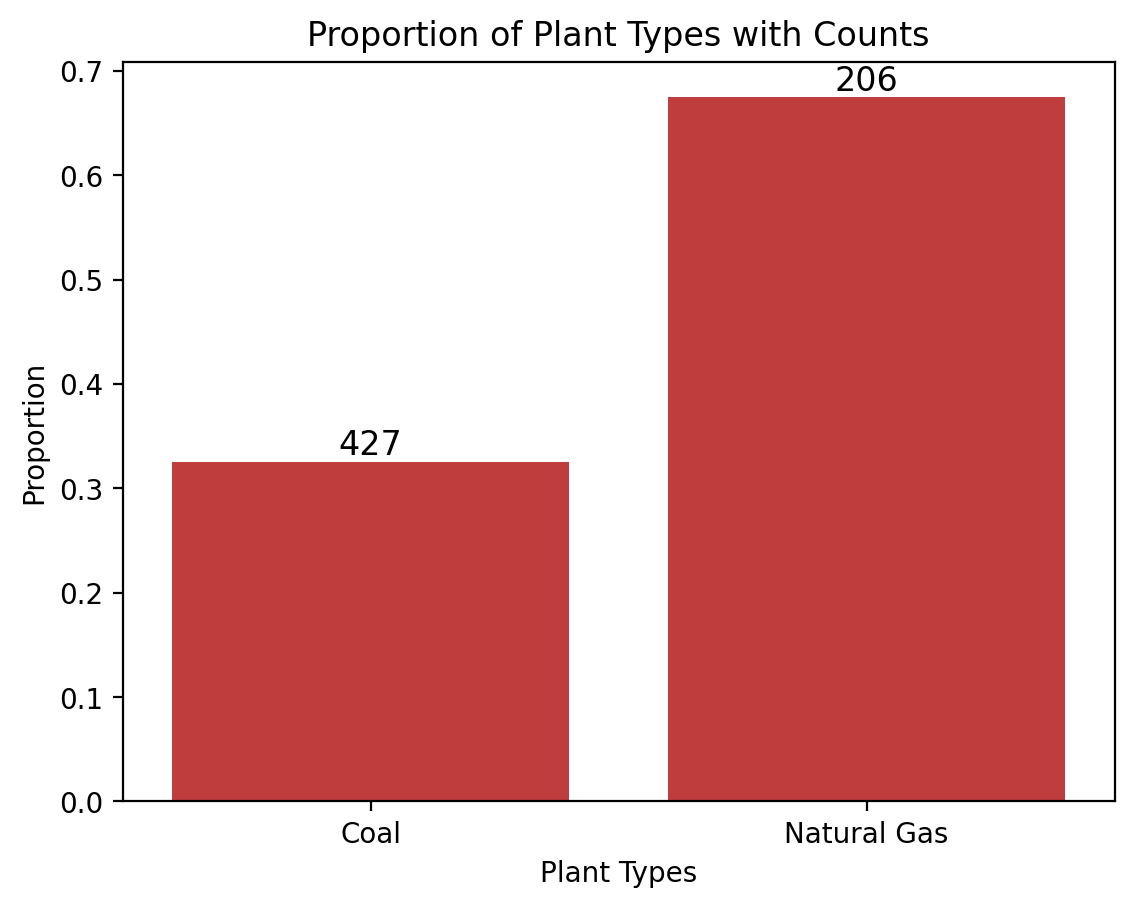

In [17]:
# Count the occurrences to compute proportions
counts = plants['Type'].value_counts()
total = counts.sum()
proportions = counts / total  # Calculate proportions

# Plot proportions
ax = sns.barplot(
    x=counts.index,
    y=proportions,
    color='tab:red'
)

# Annotate actual counts on bars using correct positioning
for p, count in zip(ax.patches, counts):
    x_position = p.get_x() + p.get_width() / 2  # Center text
    y_position = p.get_height()  # Place above the bar
    ax.annotate(f'{count}', (x_position, y_position),
                ha='center', va='bottom', fontsize=12)

# Adjust plot labels
plt.xticks(rotation=0)
plt.xlabel('Plant Types')
plt.ylabel('Proportion')
plt.title('Proportion of Plant Types with Counts')

plt.show()

Proportion of coal and natural gas plants with count stated on bars

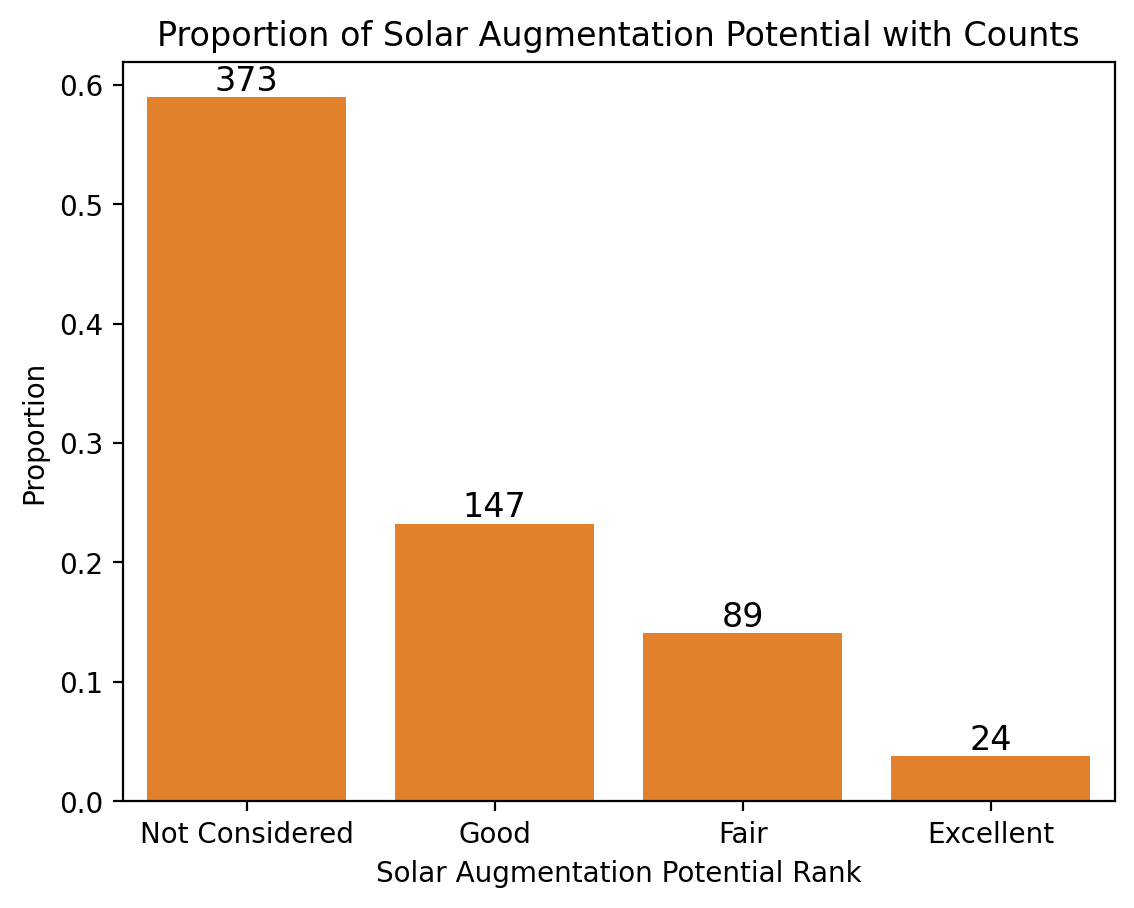

In [18]:
# Count the occurrences to compute proportions
counts = plants['Solar-Augment Potential'].value_counts()
total = counts.sum()
proportions = counts / total  # Calculate proportions

# Plot proportions
ax = sns.barplot(
    x=counts.index,
    y=proportions,
    color='tab:orange',
    order=['Not Considered', 'Good', 'Fair', 'Excellent']
)

# Annotate actual counts on bars using correct positioning
for p, count in zip(ax.patches, counts):
    x_position = p.get_x() + p.get_width() / 2  # Center text
    y_position = p.get_height()  # Place above the bar
    ax.annotate(f'{count}', (x_position, y_position),
                ha='center', va='bottom', fontsize=12)

# Adjust plot labels
plt.xticks(rotation=0)
plt.xlabel('Solar Augmentation Potential Rank')
plt.ylabel('Proportion')
plt.title('Proportion of Solar Augmentation Potential with Counts')

plt.show()

Proportion of plants with Good, Fair and Excellent solar augmentation potential, and those excluded from the study, with count values reported

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The powerplant Capacity variable has a bimodal distribution, with two peaks between ~0-250 MW and ~500-750 MW, and beyond that the distribution is broadly skewed to the right.

Counts of the data show that almost 70% of plants use natural gas a source of energy, while the remaining ~30% use coal.

Of all plants, ~60% were excluded from the solar energy augmentation potential study due to a variety of reasons for which are not given any data, just over 20% of plants have "good" potential, ~15% have "fair" potential, and ~5% have "excellent" augmentation potential.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I did not perform any operations on the capacity data other than taking the "planned" capacities for plants that are not yet in function. These represent the sum of Coal and Natural Gas plant capacities, so that it is worth investigating how each of these are distributed. There are minor gaps in the data (e.g. between ~1500-1750 MW and ~3000-3500) which represent absence of powerplants with those capacities. The "standalone" plants with capacities ~3500 likely represent newer plants and/or planned plant with those expected capacities.

From the distribution of data observed so far it would be interesting to see if there is a correlation between augmentation potential and plant type (e.g. coal plants are more likely to yield best augmentation).

## Bivariate Exploration

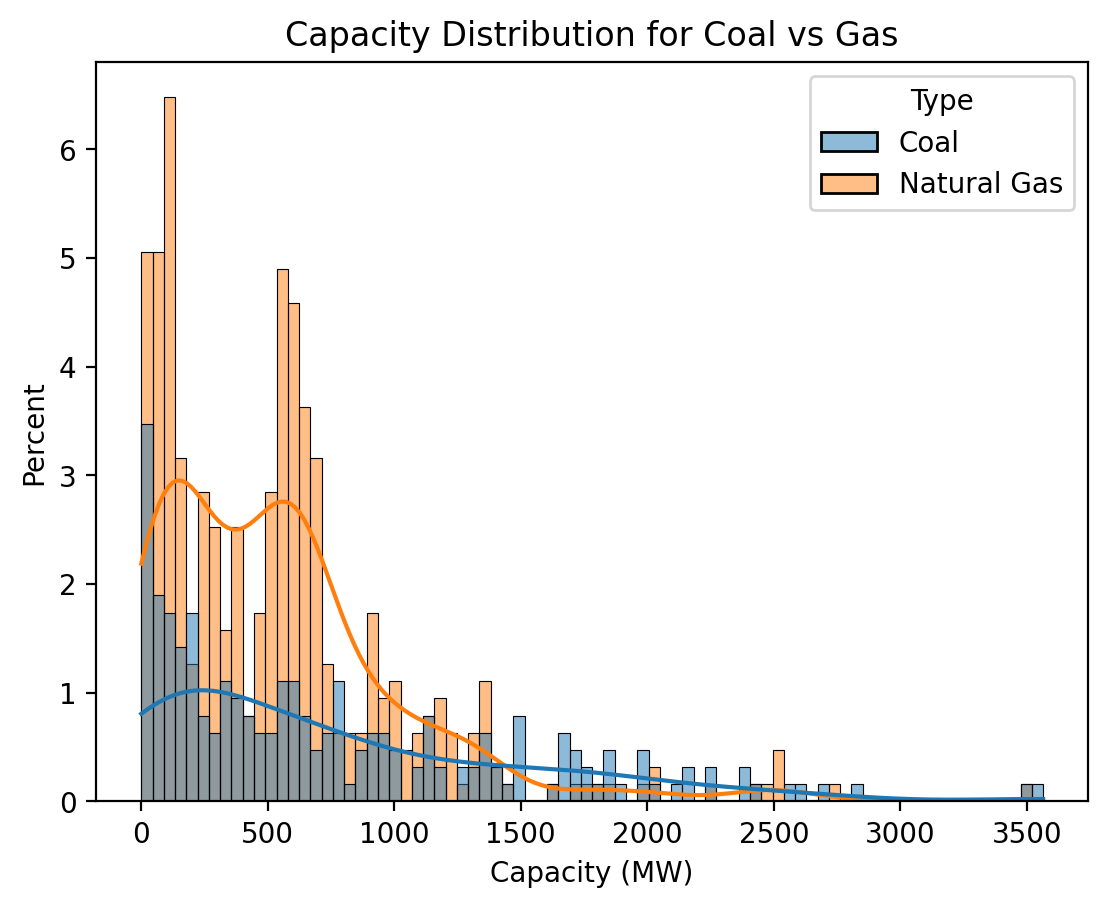

In [19]:
# Plot histogram for 'Capacity (MW)' with hue
sns.histplot(data=plants, x='Capacity (MW)', hue='Type', stat='percent', kde=True, bins=80)
plt.title('Capacity Distribution for Coal vs Gas')
plt.show()

After separaing the powerplant Capacity by energy source Type, coal and natural gas, it is apparent that the bimodal distribution strongly pertains to natural gas plants, whereas the coal plants more broadly follow a unimodal distribution, with more data (plants) bearing higher energy capacities overall.

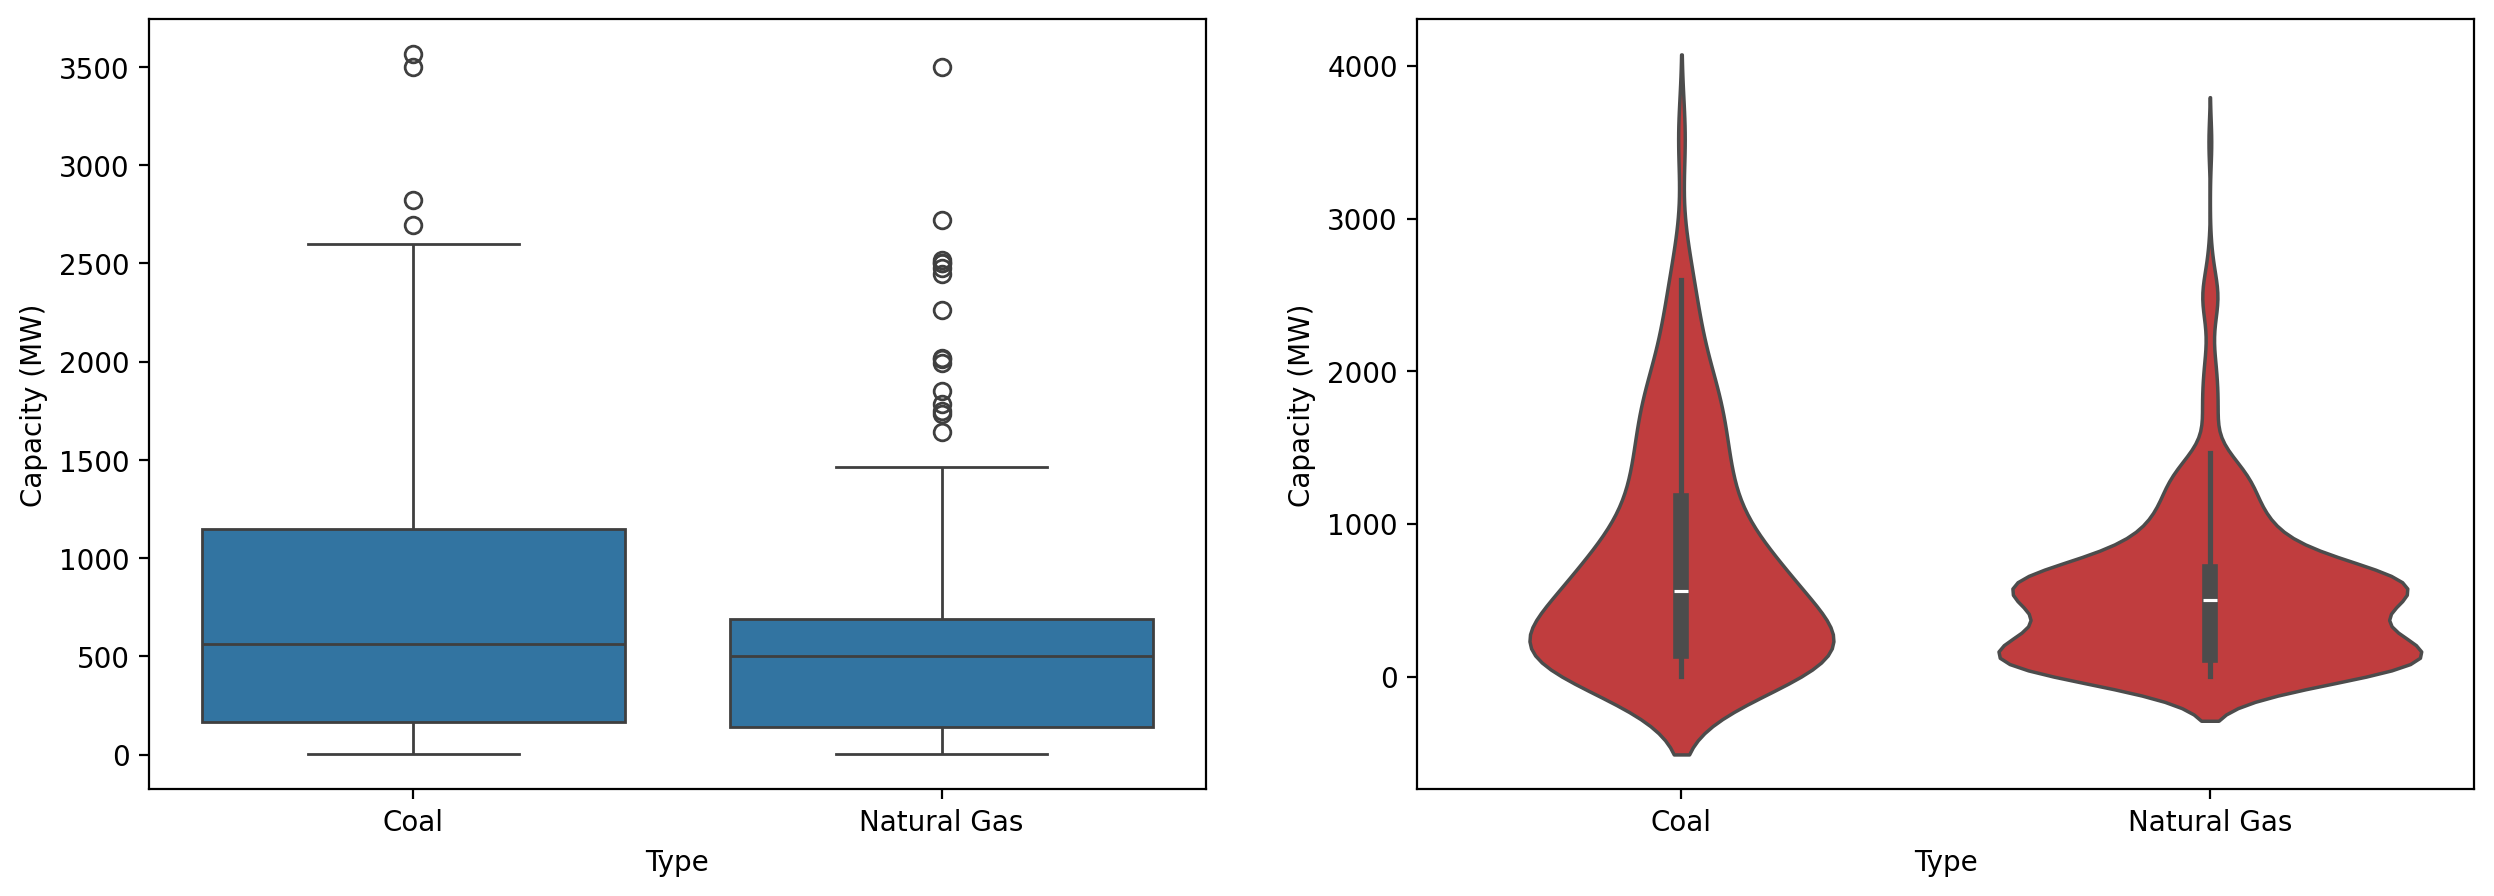

In [20]:
# Box - Violin plots
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(15,5))

sns.boxplot(data=plants, x='Type', y='Capacity (MW)', color='tab:blue', ax=ax1)
plt.xticks(rotation=0)

sns.violinplot(data=plants, x='Type', y='Capacity (MW)', color='tab:red', ax=ax2)
plt.xticks(rotation=0);


Separating the plants by energy source type, while the mean capacities are similar, coal plants yield higher capacities, although the max capacity data, outliers to the main distributions, are similar. Plotted as a violin plot one may appreciate the mostly unimodal skewed distribution of the coal plants, versus the bimodal and skewed distribution of the natural gas plants.

In [21]:
# Filtering dataframe to eliminate Not Considered rank
filtered_plants = plants[
    plants['Type'].isin(['Coal', 'Natural Gas']) & 
    plants['Solar-Augment Potential'].isin(['Excellent', 'Good', 'Fair'])
].copy()

# Remove unused categories to ensure "Not Considered" is no longer part of the categorical levels
filtered_plants['Solar-Augment Potential'] = filtered_plants['Solar-Augment Potential'].cat.remove_unused_categories()

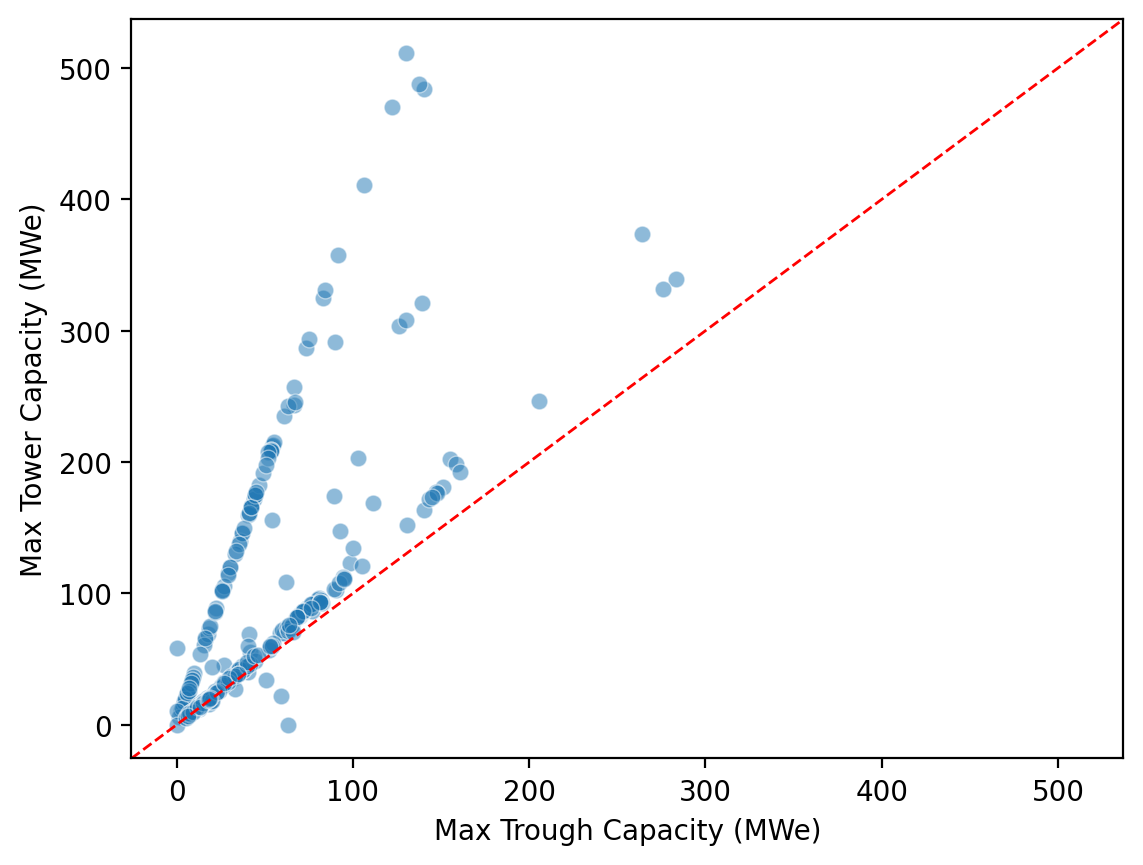

In [22]:
# Scatter plot
sns.scatterplot(data=filtered_plants, x='Max Trough Capacity (MWe)', y='Max Tower Capacity (MWe)', alpha=0.5);
plt.xlabel('Max Trough Capacity (MWe)')
plt.ylabel('Max Tower Capacity (MWe)')

# Add diagonal line
# Get the axis limits
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

# Set the limits to be the same to ensure the diagonal is correct
# Ensure the plot covers the same range for both axes, 
# aligning the  x - and  y -axes for the diagonal
min_val = min(xmin, ymin)
max_val = max(xmax, ymax)
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Plot the diagonal line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1);

Investigating the relation between the two different technologies for solar augmentation, as informed from the study itself the Solar Tower technology has higher capacity potential than the Solar Trough technology. However, there are two trends in the data, one just above the one-to-one correlation line, and another for much higher Tower vs Trough capacity. We don't know whether these trends are for the different source types (coal vs natural gas), or are related to the augmentation potential rank, and therefore due to a variety of factors.

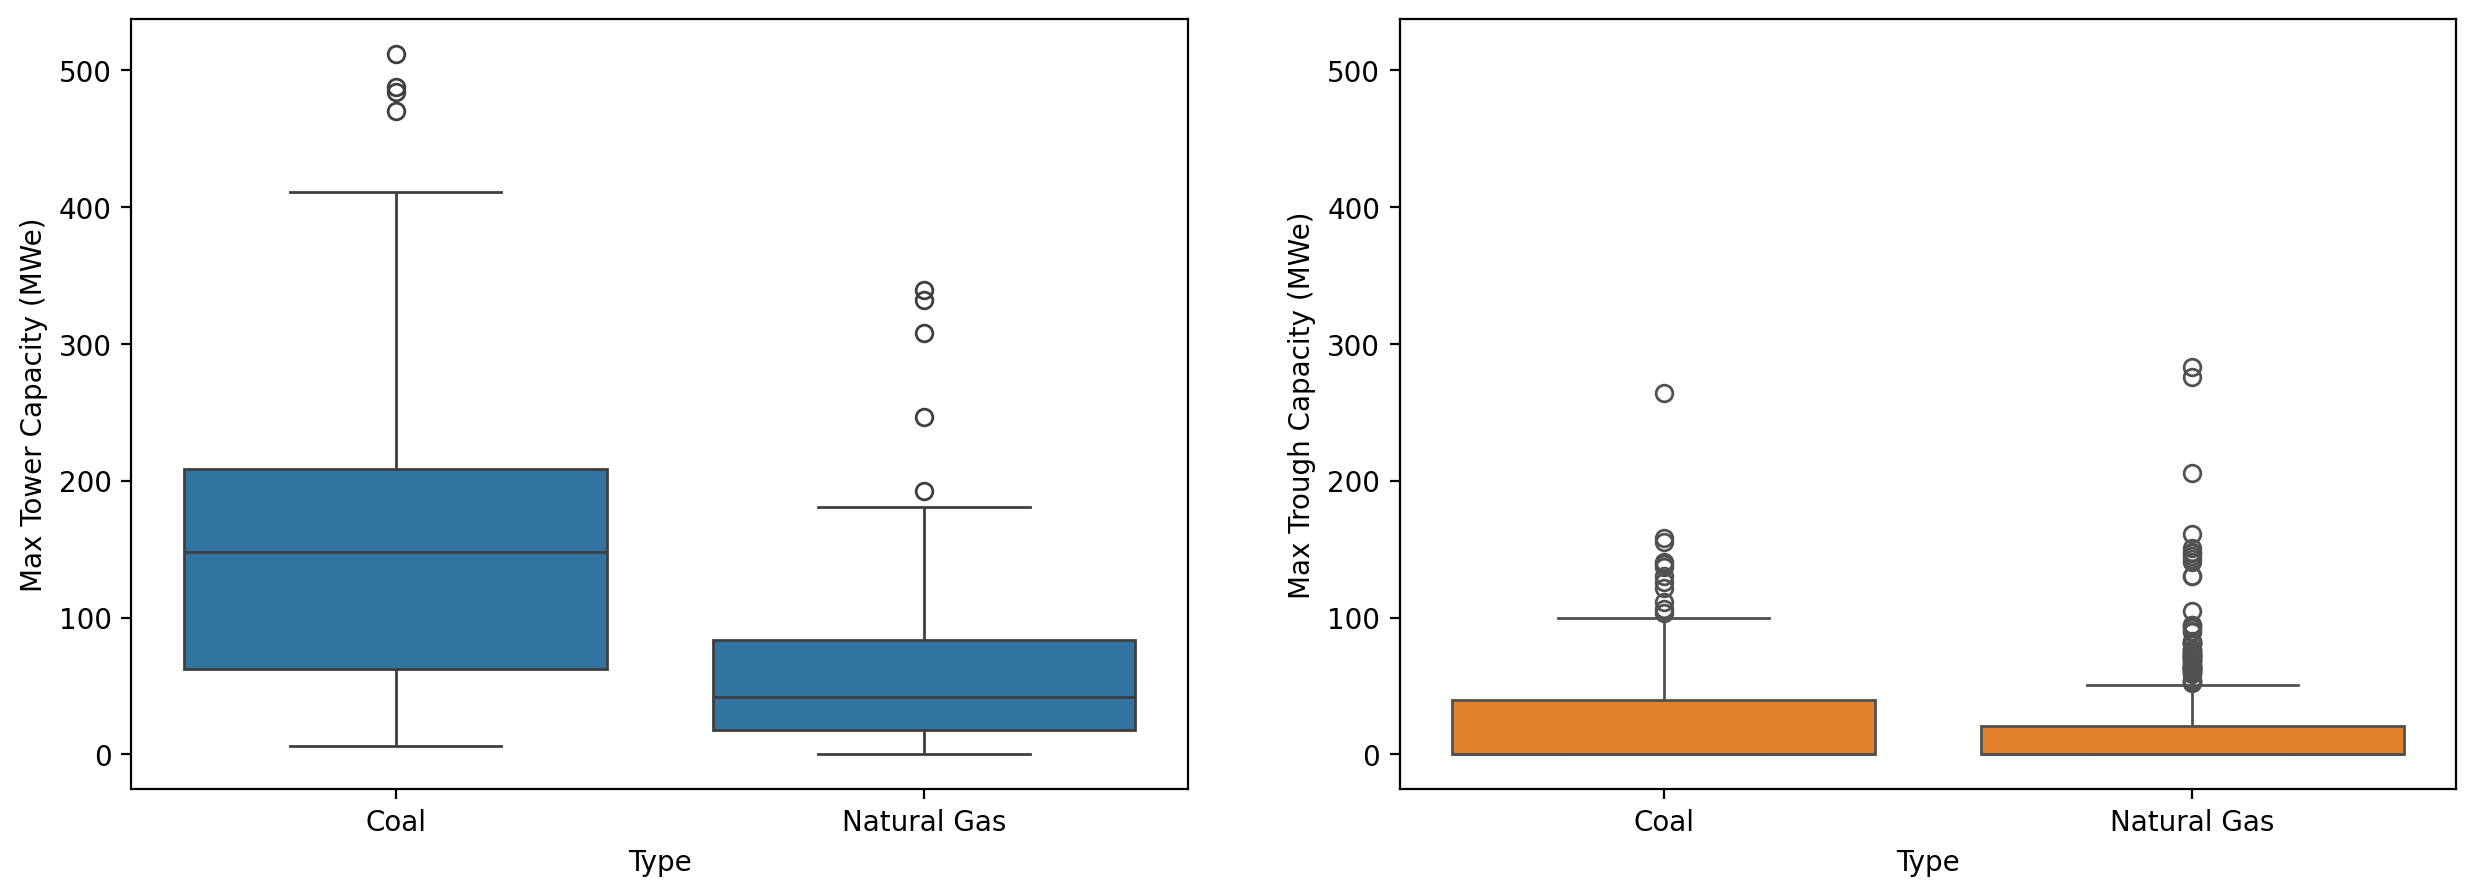

In [23]:
# Box plot
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(15,5))

sns.boxplot(data=filtered_plants, x='Type', y='Max Tower Capacity (MWe)', color='tab:blue', ax=ax1)
plt.xticks(rotation=0)

sns.boxplot(data=plants, x='Type', y='Max Trough Capacity (MWe)', color='tab:orange', ax=ax2)
plt.xticks(rotation=0)

plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot;

Separating the augmentation capacities for the two methods, coal plants consistently have higher capacities, and in the caes of solar tower technology, a higher max distribution. Note that the two plots have the same scale for comparison.

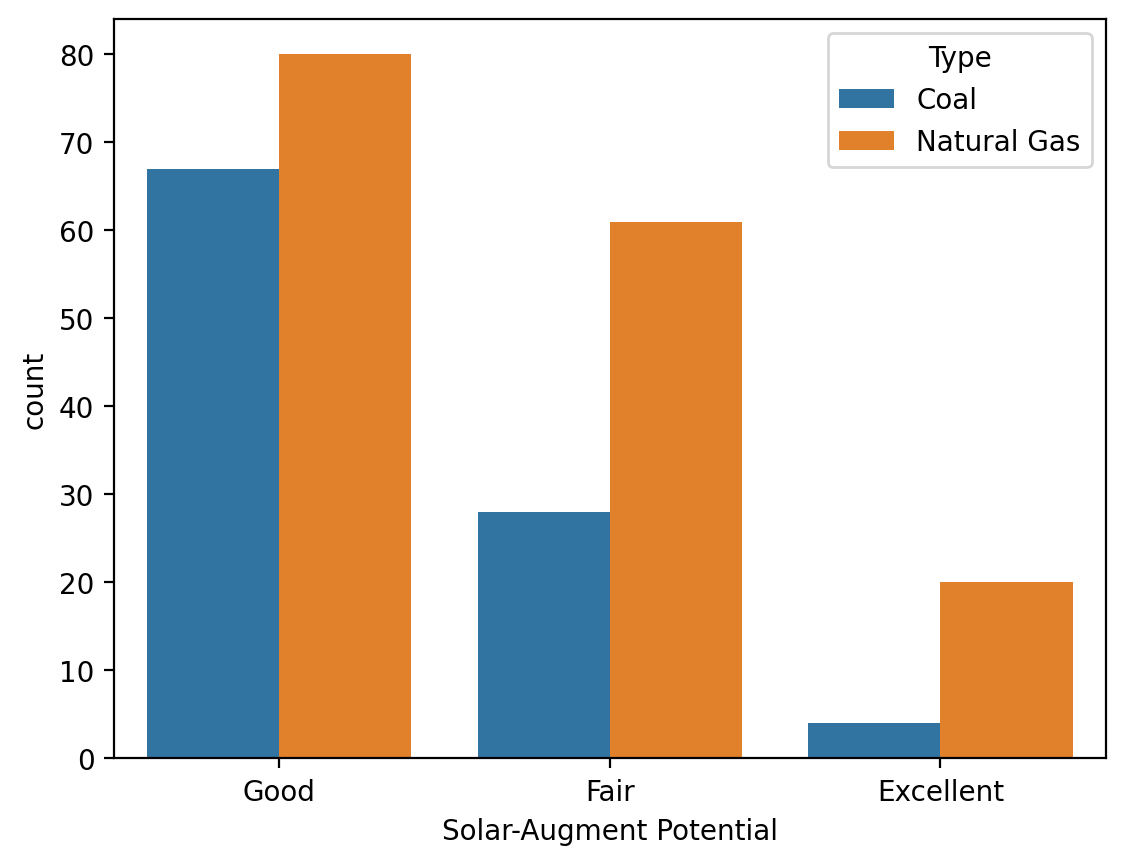

In [24]:
# clustered bar chart for Rank on the x axis and Coal vs NG Type counts on Y
sns.countplot(data=filtered_plants, x='Solar-Augment Potential', hue='Type', order= ['Good', 'Fair', 'Excellent']);

Separating the plant data by solar augmentation potential, it is evident that out of the plants considered for the study, for both energy source types most of the plants ranked as "Good" (70-80%), followed by "Fair" (30-70%) and "Excellent" showing the smallest number of plants (5-20%). In each rank, there are more natural gas than coal plants. The distribution of rank versus technology type remains to be determined.

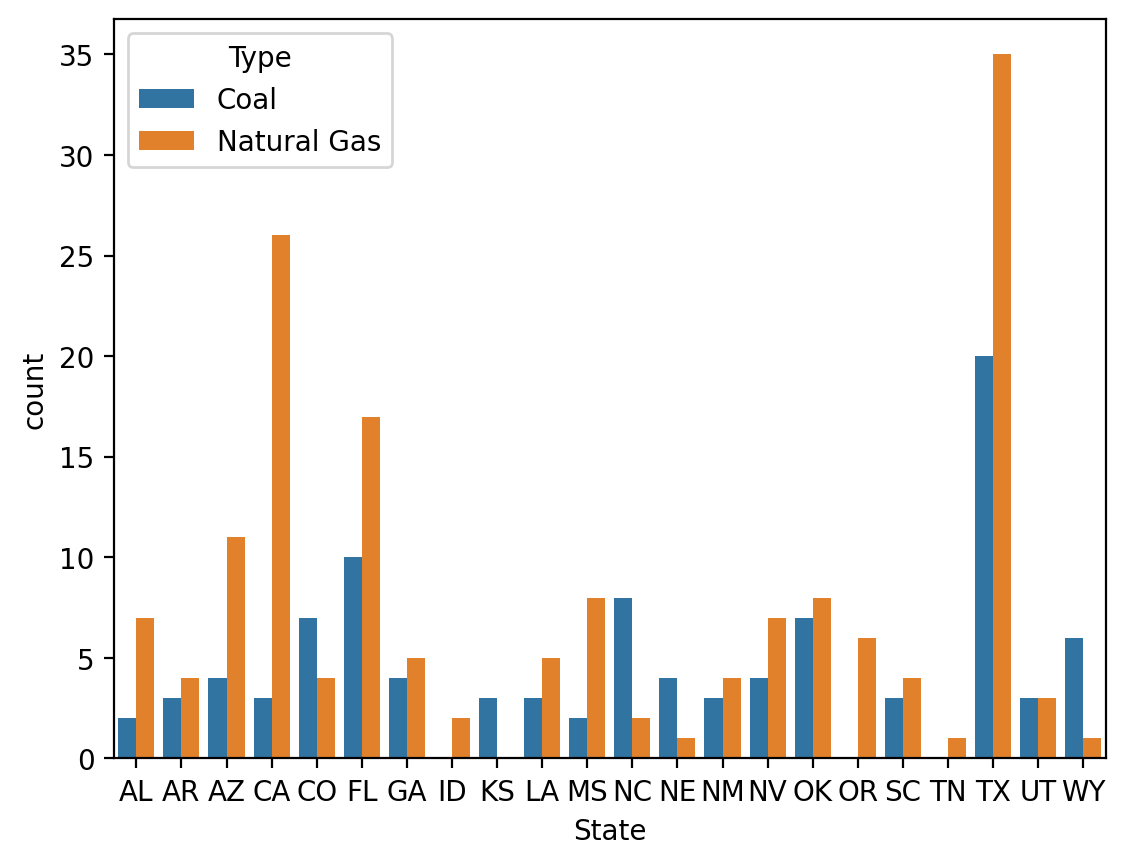

In [25]:
# clustered bar chart for State on the x axis for Coal vs NG Types
sns.countplot(data=filtered_plants, x='State', hue='Type');

Distribution of coal and natural gas plants across the states considered for the study

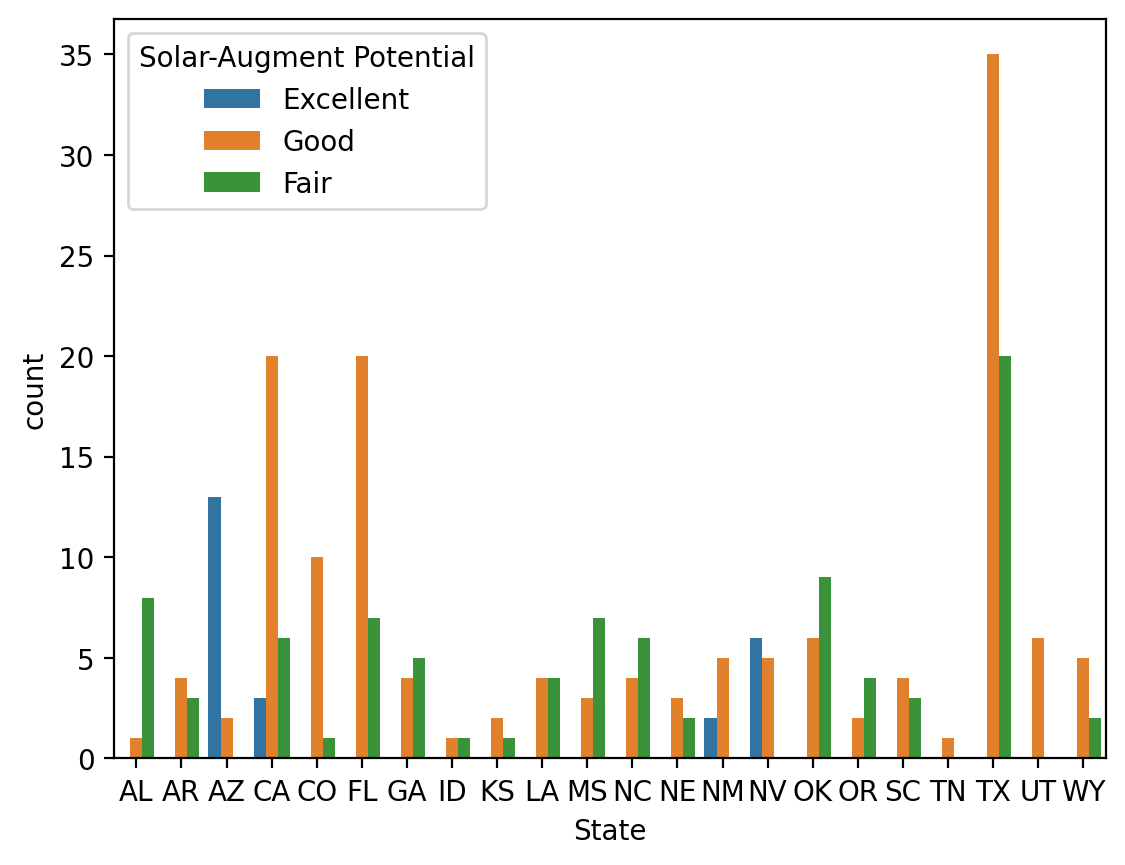

In [26]:
# clustered bar chart for State on the x axis for Solar Augmnetaton Potential
sns.countplot(
    data=filtered_plants, 
    x='State', 
    hue='Solar-Augment Potential',  
    hue_order=['Excellent', 'Good', 'Fair']
);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Natural gas plants have a bimodal distribution, whereas the coal plants more broadly follow a unimodal distribution, with more data (plants) bearing higher energy capacities overall.

By energy source type, coal plants yield overall higher capacities, although the means and max capacities for both source types are similar.

Solar Tower augmentation technology has higher capacity potential than the Solar Trough technology, but there are two trends in the data, which need to be investigated: could be for the different source types (coal vs natural gas), or be related to other factors which affect the augmentation potential ranking. 

Solar augmentation capacity for coal plants is consistently higher, regardless of technology type, likely answering the "question" above, yet it remains to be seen whether this correlates or is independent of ranking.

Finaly, by solar augmentation potential, most of the plants considered for the study were ranked as "Good", followed by "Fair" and "Excellent". There are more natural gas than coal plants in each rank, so that it would appear than the multiple conditions (plant age, availability of land, slope, etc.) that determine the rank would outweigh the higher augmentation capacity of coal plants.

Open questions: 
- does solar augemntation capacity for source type also correlate with ranking, with most coal plants in the "Excellent" and "Good" rank?

- how do rank and enhancement technology type correlate?

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Investigating bivariate correlations across States, while California, Florida and Texas have the most plants overall, Arizona stands out in terms of excellent potential for solar augmentation, while Texas has the most augmentation potential overall, likely because of more plants, but in the Good and Fair ranks.

## Multivariate Exploration

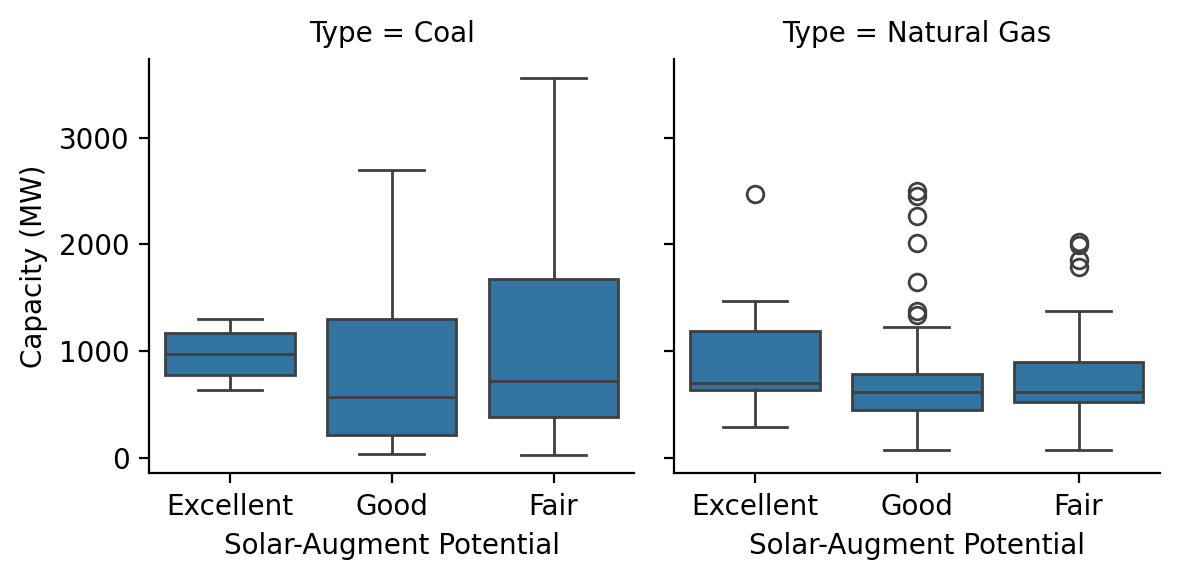

In [27]:
# Facet Grid of capacity versus ranking for source types
rank_order= ['Excellent', 'Good', 'Fair']

g = sns.FacetGrid(data=filtered_plants, col='Type')
g.map(sns.boxplot, 'Solar-Augment Potential', 'Capacity (MW)', order= rank_order)

for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())  # Ensure ticks are set
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

This facetgrid shows the relation between plant capacity and the solar augmentation potential by source type. The mean capacities are rather comparable across source types and augmentation potential, indicating that larger capacity plants necessarily offer more augmentation potential. However, the mean of coal plants with Excellent potential is the highest, suggesting larger overall return for these plants, if augmented. On the contrary, there is a broader distribution of coal plants in the Fair rank, including data of highest capacity, suggesting that despite the capacity, the return may not be as favorable. For the natural gas plants, the Excellent rank has the broadest distribution and some of the highest data, and similarly the Good rank has comparable mean, narrower distribution, but many outliers towards high capacities, suggesting favorable returns for these plants.

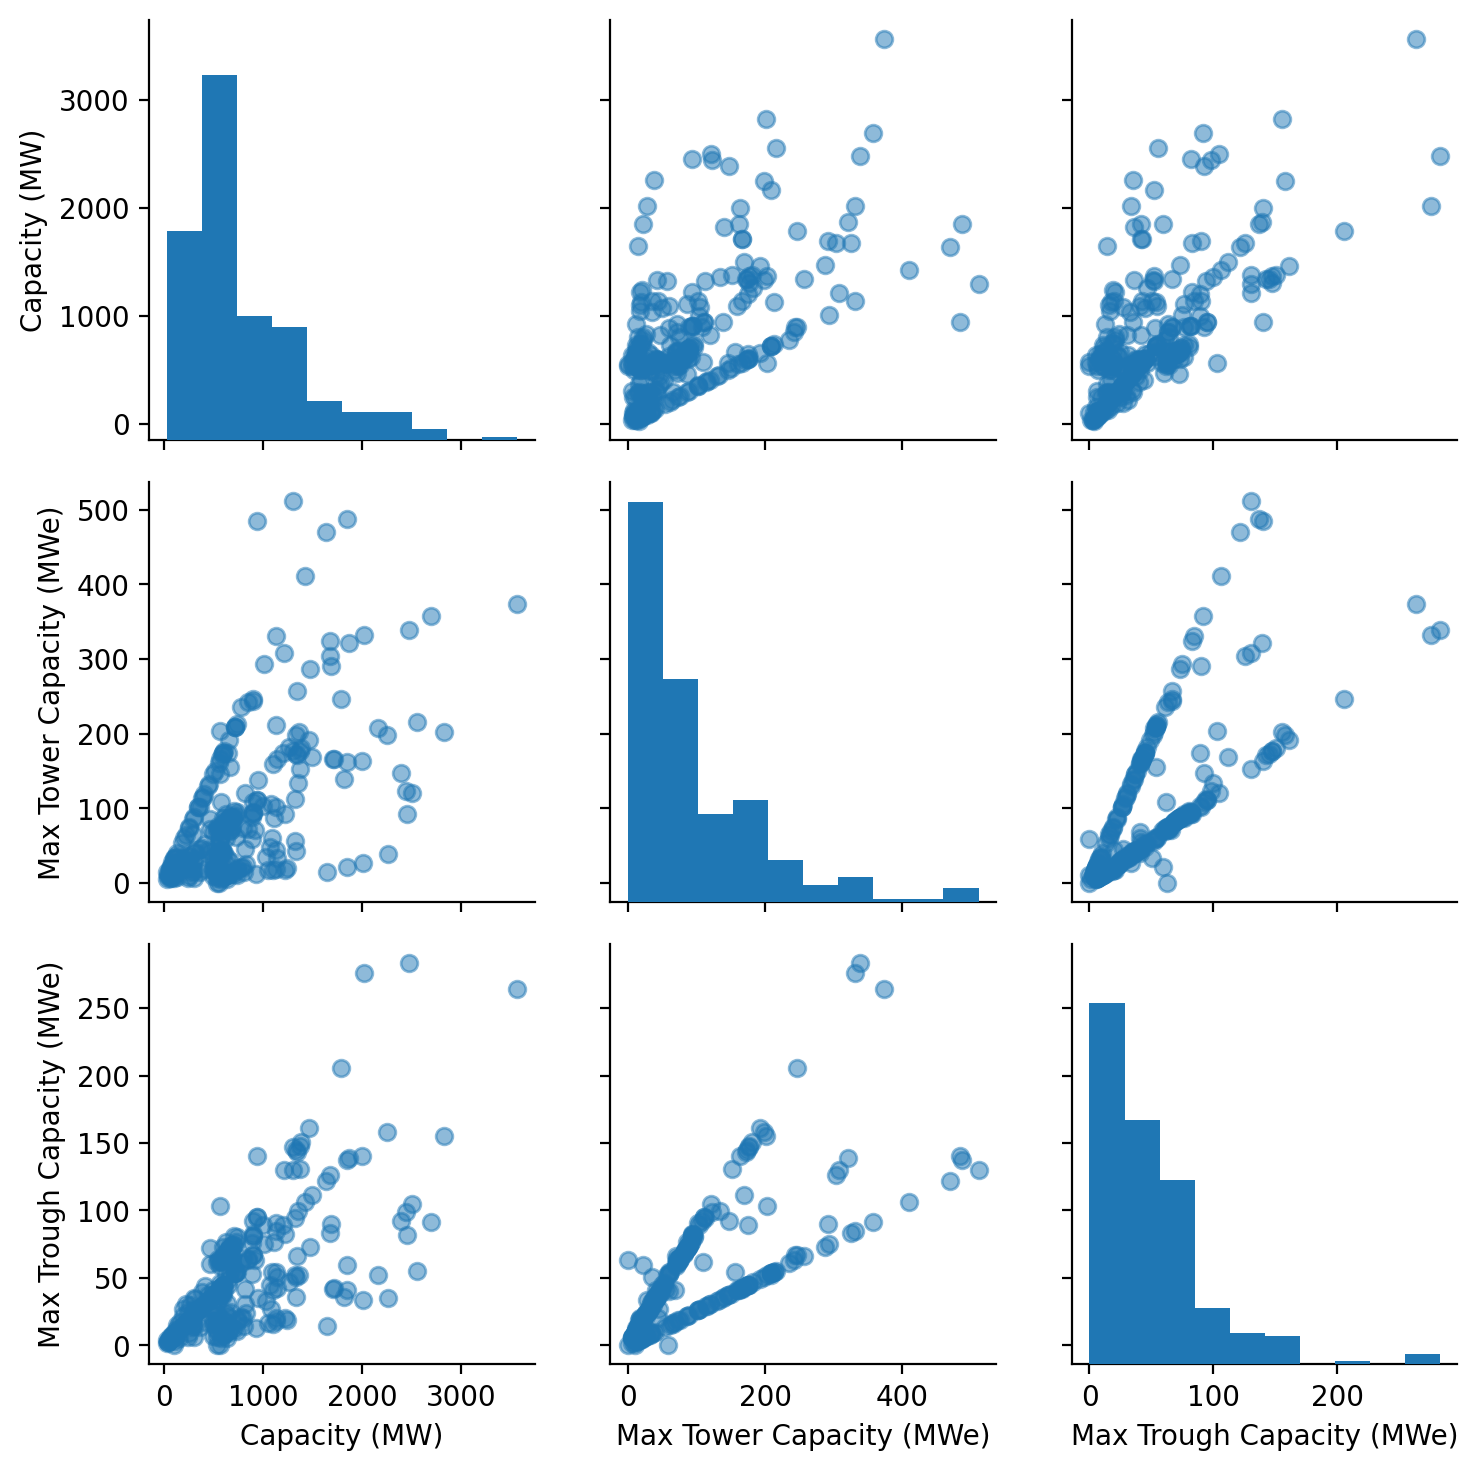

In [28]:
# Plot Matrix: Capacities

# Select efficiency stats
capacities = ['Capacity (MW)', 'Max Tower Capacity (MWe)', 'Max Trough Capacity (MWe)']

# Plot
g = sns.PairGrid(data=filtered_plants, vars=capacities);
g.map_offdiag(plt.scatter, alpha=0.5); # set off-diagonal plot
g.map_diag(plt.hist); # set diagonal plot

A scatterplot matrix across the three numerical variables, with histograms for the diagonal shows that: each variable has a predominantly unimodal distribution (at the set histogram bin size), with more data at low energy capacities; as we have already seen, the two solar augmentation technologies (Tower and Trough) plotted against each other define two clear trends; Each augmentation technology versus plant capacity yields more scatter and multiple trends.

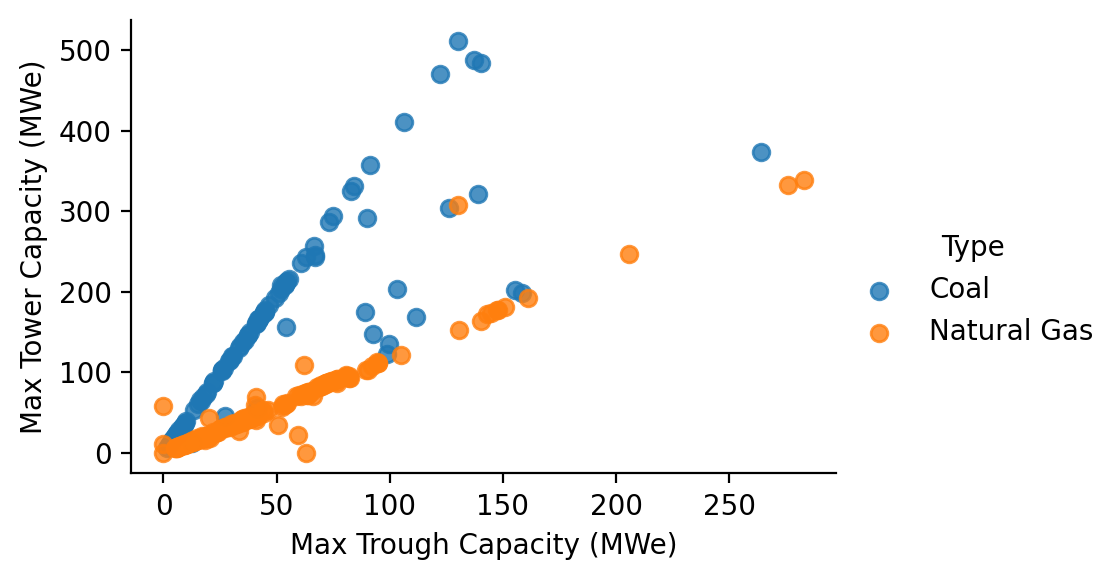

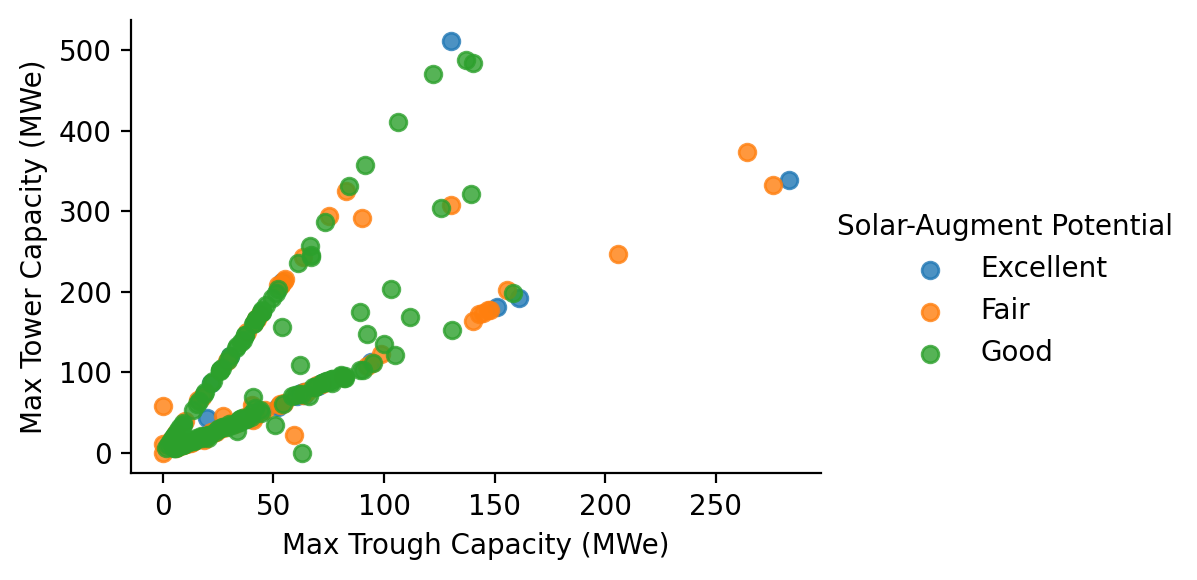

In [29]:
# Scatterplots (regplots) with multiple encodings for Solar Enhancement Technologies
g = sns.FacetGrid(data=filtered_plants, hue='Type',
               aspect=1.5)
g.map(sns.regplot,'Max Trough Capacity (MWe)','Max Tower Capacity (MWe)', fit_reg=False)
g.add_legend()

g = sns.FacetGrid(data=filtered_plants, hue='Solar-Augment Potential',
               aspect=1.5)
g.map(sns.regplot,'Max Trough Capacity (MWe)','Max Tower Capacity (MWe)', fit_reg=False)
g.add_legend()
plt.show();

The double trend defining the two enhancement technologies largely correlates with source type rather than plant augmentation potential.

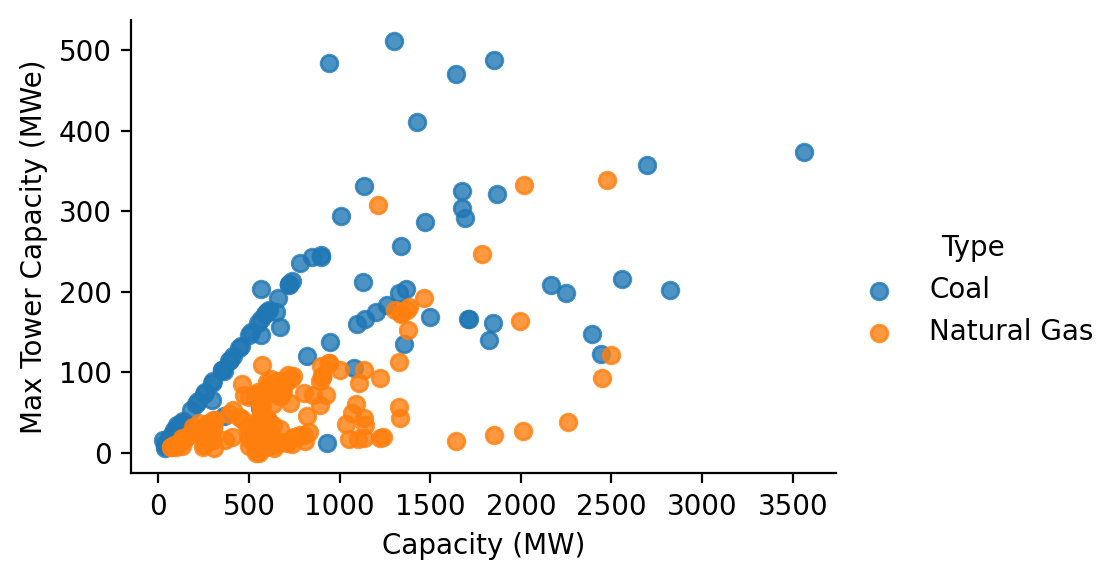

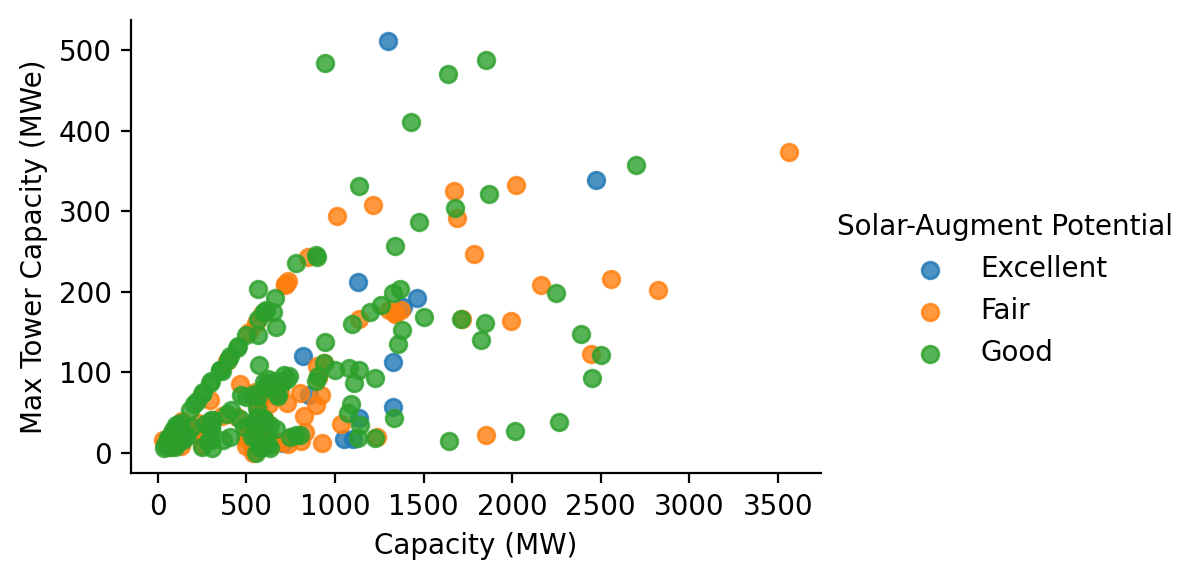

In [30]:
# Scatterplots (regplots) with multiple encodings for solar towar versus capacity
g = sns.FacetGrid(data=filtered_plants, hue='Type',
               aspect=1.5)
g.map(sns.regplot,'Capacity (MW)','Max Tower Capacity (MWe)', fit_reg=False)
g.add_legend()

g = sns.FacetGrid(data=filtered_plants, hue='Solar-Augment Potential',
               aspect=1.5)
g.map(sns.regplot,'Capacity (MW)','Max Tower Capacity (MWe)', fit_reg=False)
g.add_legend()
plt.show();

The multiple trends in Max Tower Capacity versus Capacity appear to be mostly scatter and don't result from either source type or augmentation potential and will not be investigated further (could correlate with State).

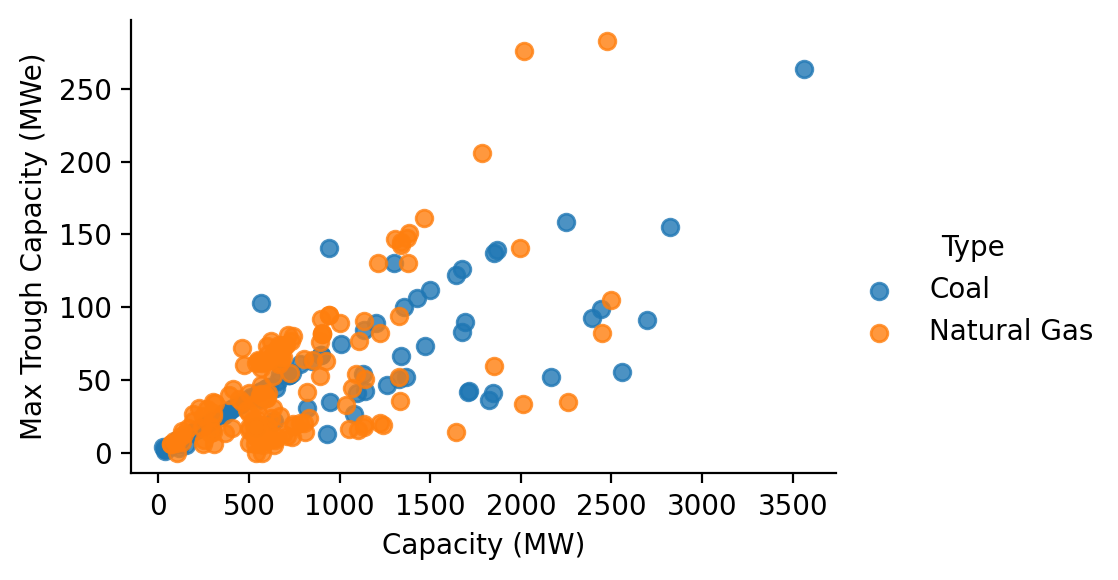

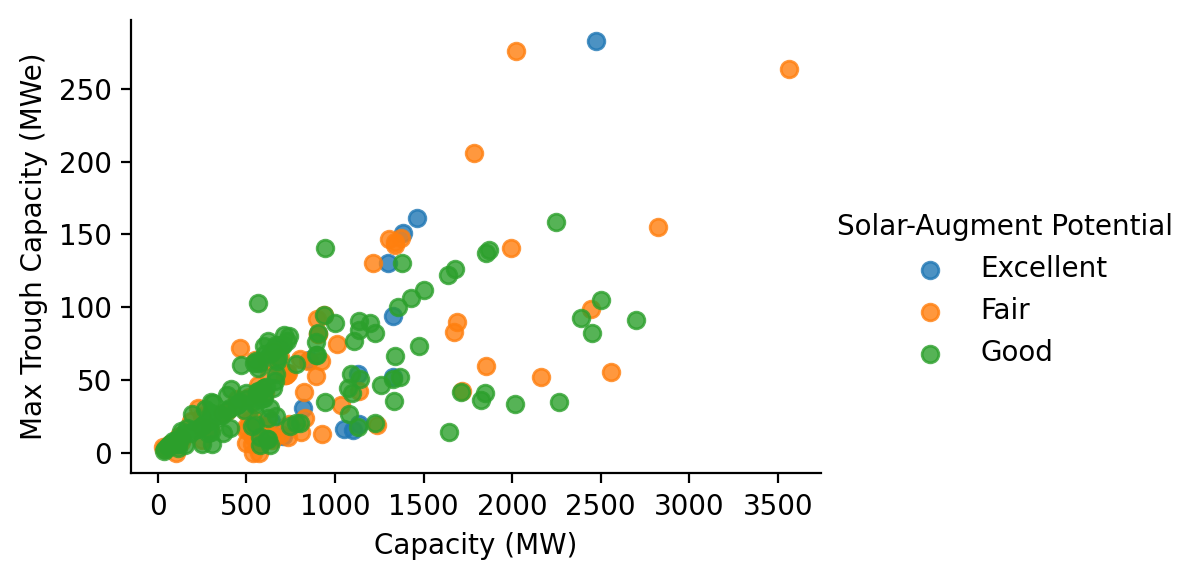

In [31]:
# Scatterplots (regplots) with multiple encodings for solar trough versus capacity
g = sns.FacetGrid(data=filtered_plants, hue='Type',
               aspect=1.5)
g.map(sns.regplot,'Capacity (MW)','Max Trough Capacity (MWe)', fit_reg=False)
g.add_legend()

g = sns.FacetGrid(data=filtered_plants, hue='Solar-Augment Potential',
               aspect=1.5)
g.map(sns.regplot,'Capacity (MW)','Max Trough Capacity (MWe)', fit_reg=False)
g.add_legend()
plt.show();

The multiple trends in Max Tower Capacity versus Capacity appear to be mostly scatter and don't result from either source type or augmentation potential and will not be investigated further (could correlate with State).

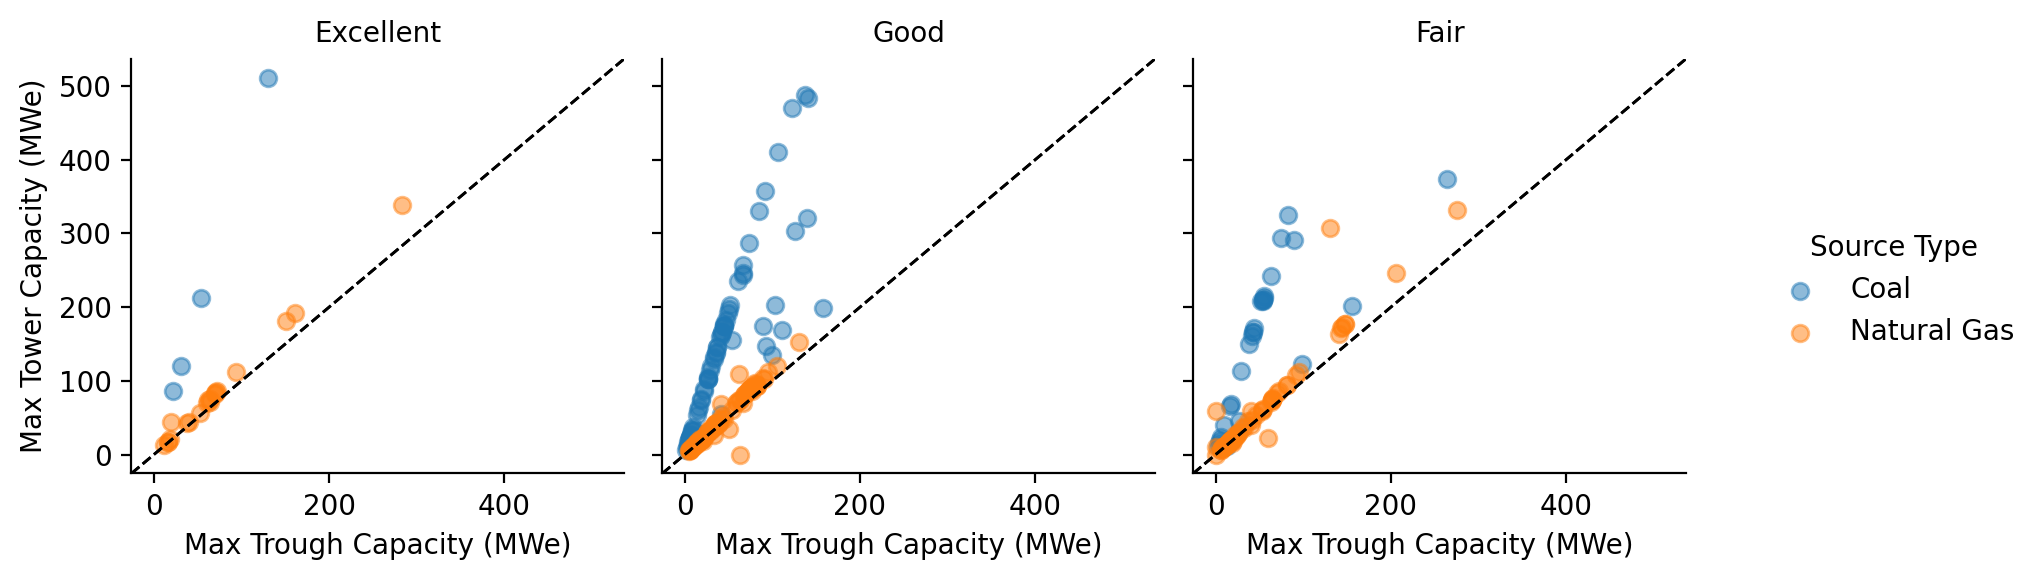

In [32]:
# Scatterplot grid of solar enhancement technologies encoded by source type and separated by augmentation potential
# Define the order of types
order = ["Excellent", "Good", "Fair"]

g = sns.FacetGrid(data=filtered_plants, col='Solar-Augment Potential', hue='Type', margin_titles=True, col_order=order)
g.map(plt.scatter, 'Max Trough Capacity (MWe)','Max Tower Capacity (MWe)', alpha=0.5)

# Function to add 1:1 diagonal line
def plot_diagonal(*args, **kwargs):
    ax = plt.gca()  # Get current axis
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    
    # Set equal limits for correct diagonal representation
    min_val = min(xmin, ymin)
    max_val = max(xmax, ymax)
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    
    # Plot 1:1 line
    ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', linewidth=1)

# Apply the diagonal line to each subplot
g.map(plot_diagonal)

# Layout
g.add_legend(title='Source Type')
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.show();

For the better augmentation technology correlations with source type, encoding data by augmentation potential reveals that most data fall in the Good rank, especially for coal. For coal, while there are few data in the excellent rank, these have a broad distribution and reach the heighest enhancement capacity. Gas plants with similar maximum enhancemnet capacities are in the excellent and fair rankings.

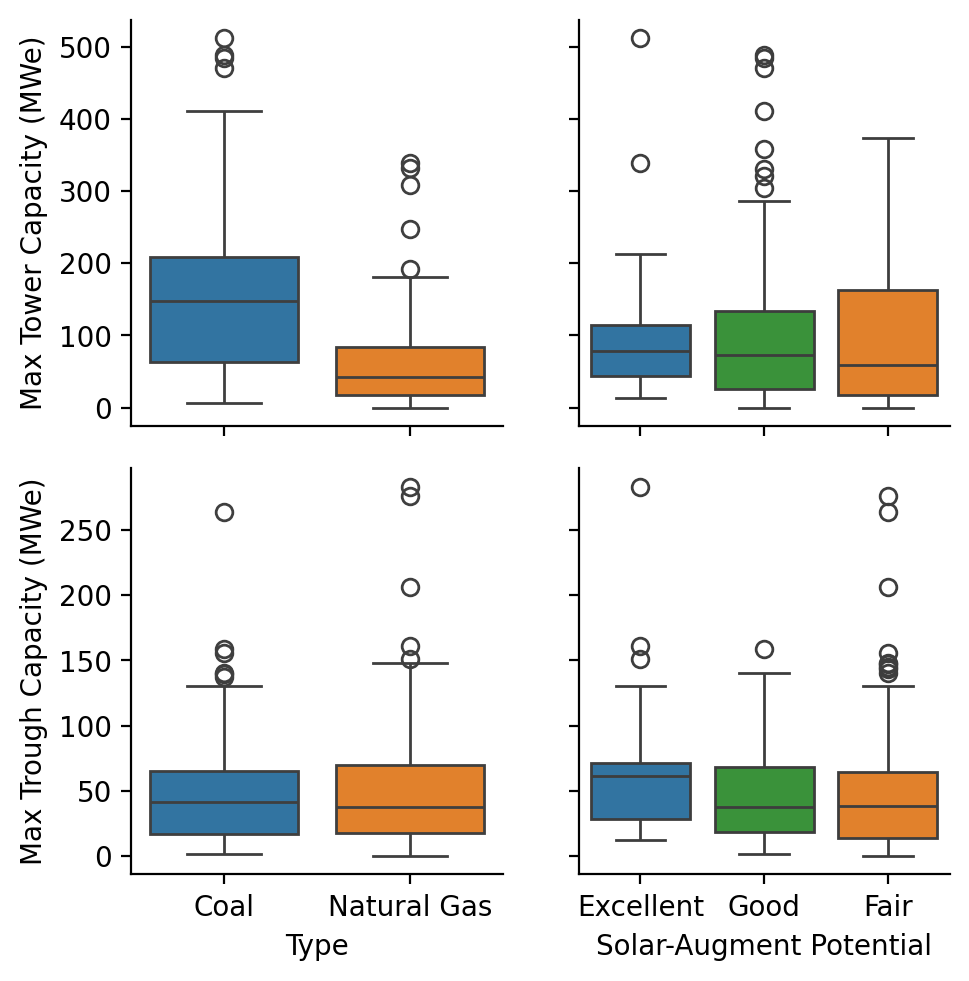

In [33]:
# Pair grid of boxplots with the augmentation technologies on each row and source type and rank on each column
# Define the desired order for categories
augment_order = ["Excellent", "Good", "Fair"]
type_order = ["Coal", "Natural Gas"]


# Create PairGrid
g = sns.PairGrid(
    data=filtered_plants,
    x_vars=['Type', 'Solar-Augment Potential'], 
    y_vars=['Max Tower Capacity (MWe)', 'Max Trough Capacity (MWe)']
)

# Function to apply boxplot with the correct order
def custom_boxplot(x, y, **kwargs):
    if x.name == 'Type':
        sns.boxplot(x=x, y=y, order=type_order, hue=x, palette="tab10", legend=False, **kwargs)
    elif x.name == 'Solar-Augment Potential':
        sns.boxplot(x=x, y=y, order=augment_order, hue=x, palette="tab10", legend=False, **kwargs)

# Apply the function to the grid
g.map(custom_boxplot)

# Adjust layout and show the plot
plt.show()

The above is a first attempt at generating a good summary plot, however, I need to merge the two columns so that I have a rank for each energy source type in the same plot, with the two enhancement technologies on each row.

In [34]:
# Preliminary wrangling:
# Reshape the data to long format for easier plotting
melted_plants = filtered_plants.melt(
    id_vars=['Site Name', 'State', 'Lat', 'Lon', 'Type', 'Solar-Augment Potential'], 
    value_vars=['Max Tower Capacity (MWe)', 'Max Trough Capacity (MWe)'],
    var_name='Augment Technology Type', 
    value_name='Augmented Capacity (MWe)'
)

In [35]:
# View the melted dataframe
melted_plants.head(3)

,Site Name,State,Lat,Lon,Type,Solar-Augment Potential,Augment Technology Type,Augmented Capacity (MWe)
0,TS Power Plant,NV,40.6422,-116.9370,Coal,Good,Max Tower Capacity (MWe),64.7
1,Desert Rock,NM,36.5435,-108.2235,Coal,Good,Max Tower Capacity (MWe),169.2
2,Oak Grove Project,TX,31.0494,-96.4813,Coal,Good,Max Tower Capacity (MWe),484.4


In [36]:
# Saving the melted dataframe as a CSV file
melted_plants.to_csv("melted_plants_data.csv", index=False)

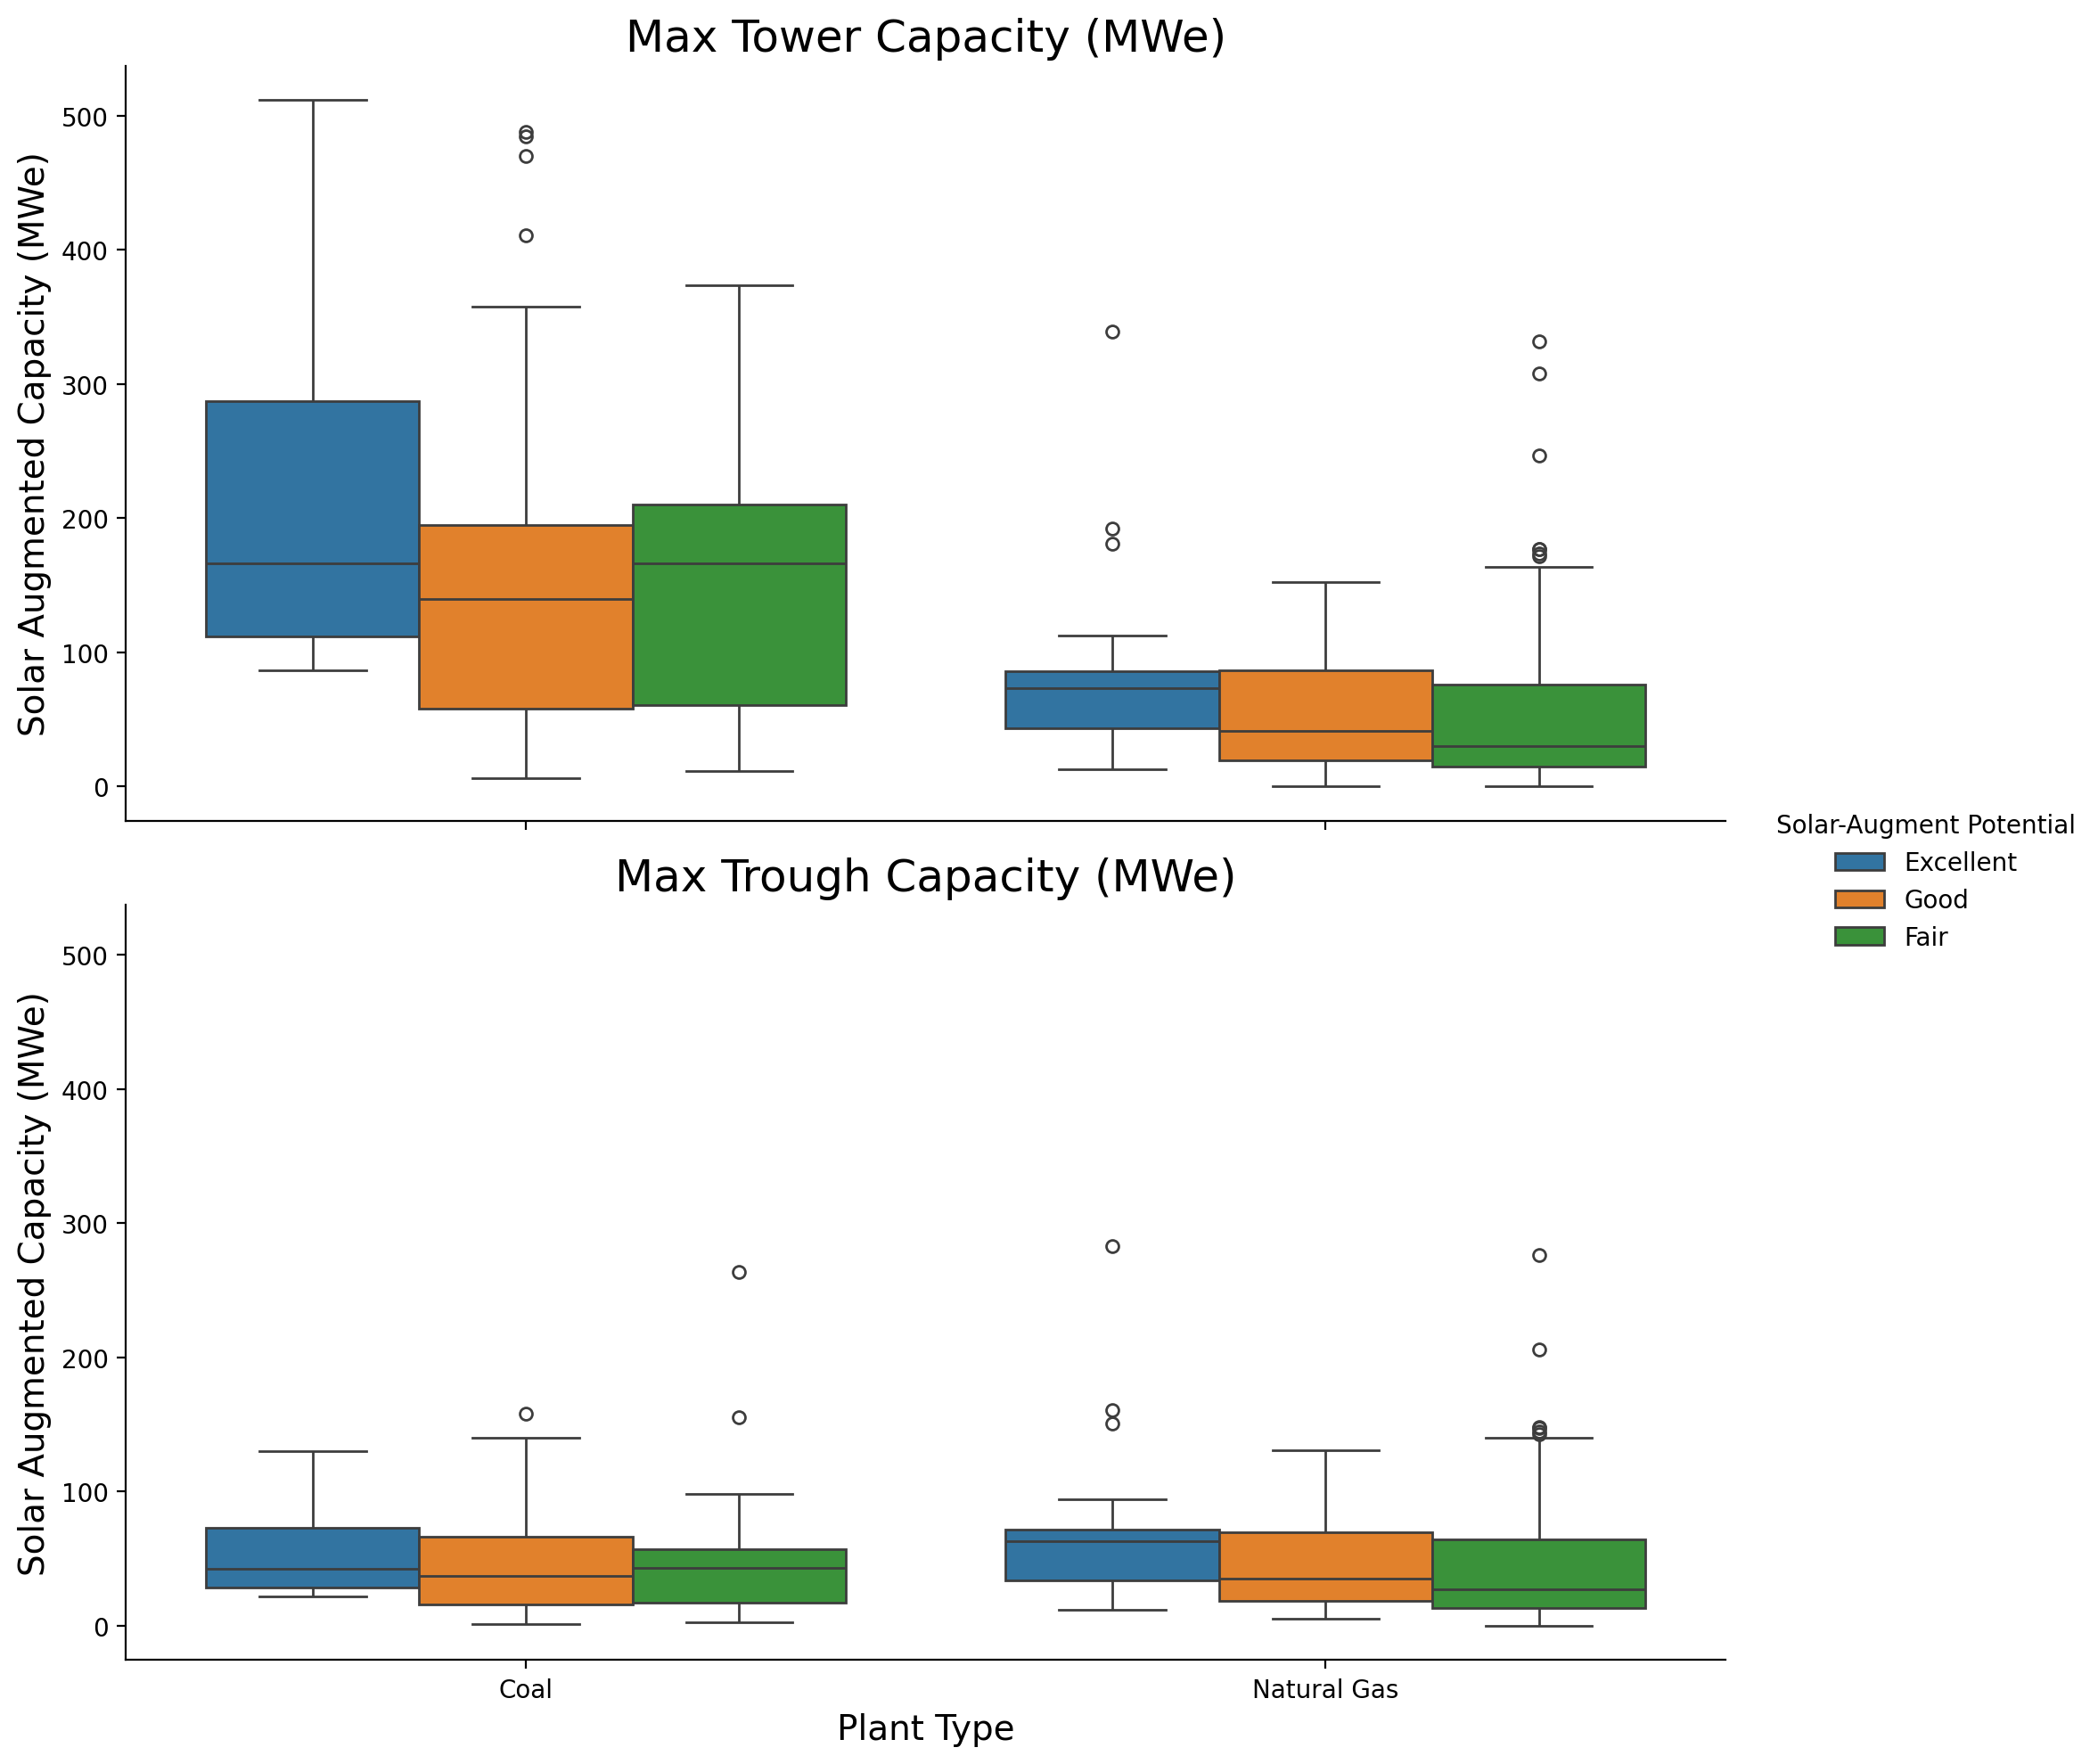

In [37]:
# Making a truly multivariable summary boxplot for the solar-augment technologies, rank and energy source
# Define the desired order for categories
augment_order = ["Excellent", "Good", "Fair"]

# Create the facet grid with two rows (one for each capacity type)
g = sns.catplot(
    data=melted_plants, 
    x='Type', 
    y='Augmented Capacity (MWe)', 
    hue='Solar-Augment Potential',  
    hue_order=augment_order,
    kind='box', 
    row='Augment Technology Type',# Different rows for capacity types
    height=5, 
    aspect=2
)

# Adjust labels and layout
g.set_axis_labels('Plant Type', 'Solar Augmented Capacity (MWe)', size= 14)
g.set_titles(row_template="{row_name}", size=18)  # Title per row
g.tight_layout()

plt.show()

Viewing all variables in the same plot immediately shows that the most effective augmentation is for coal plants using the solar tower technology irrespective of augmentation rank. For natural gas plants, the two different technologies are rather comparable, with a slight advantage margin for the solar tower technology.

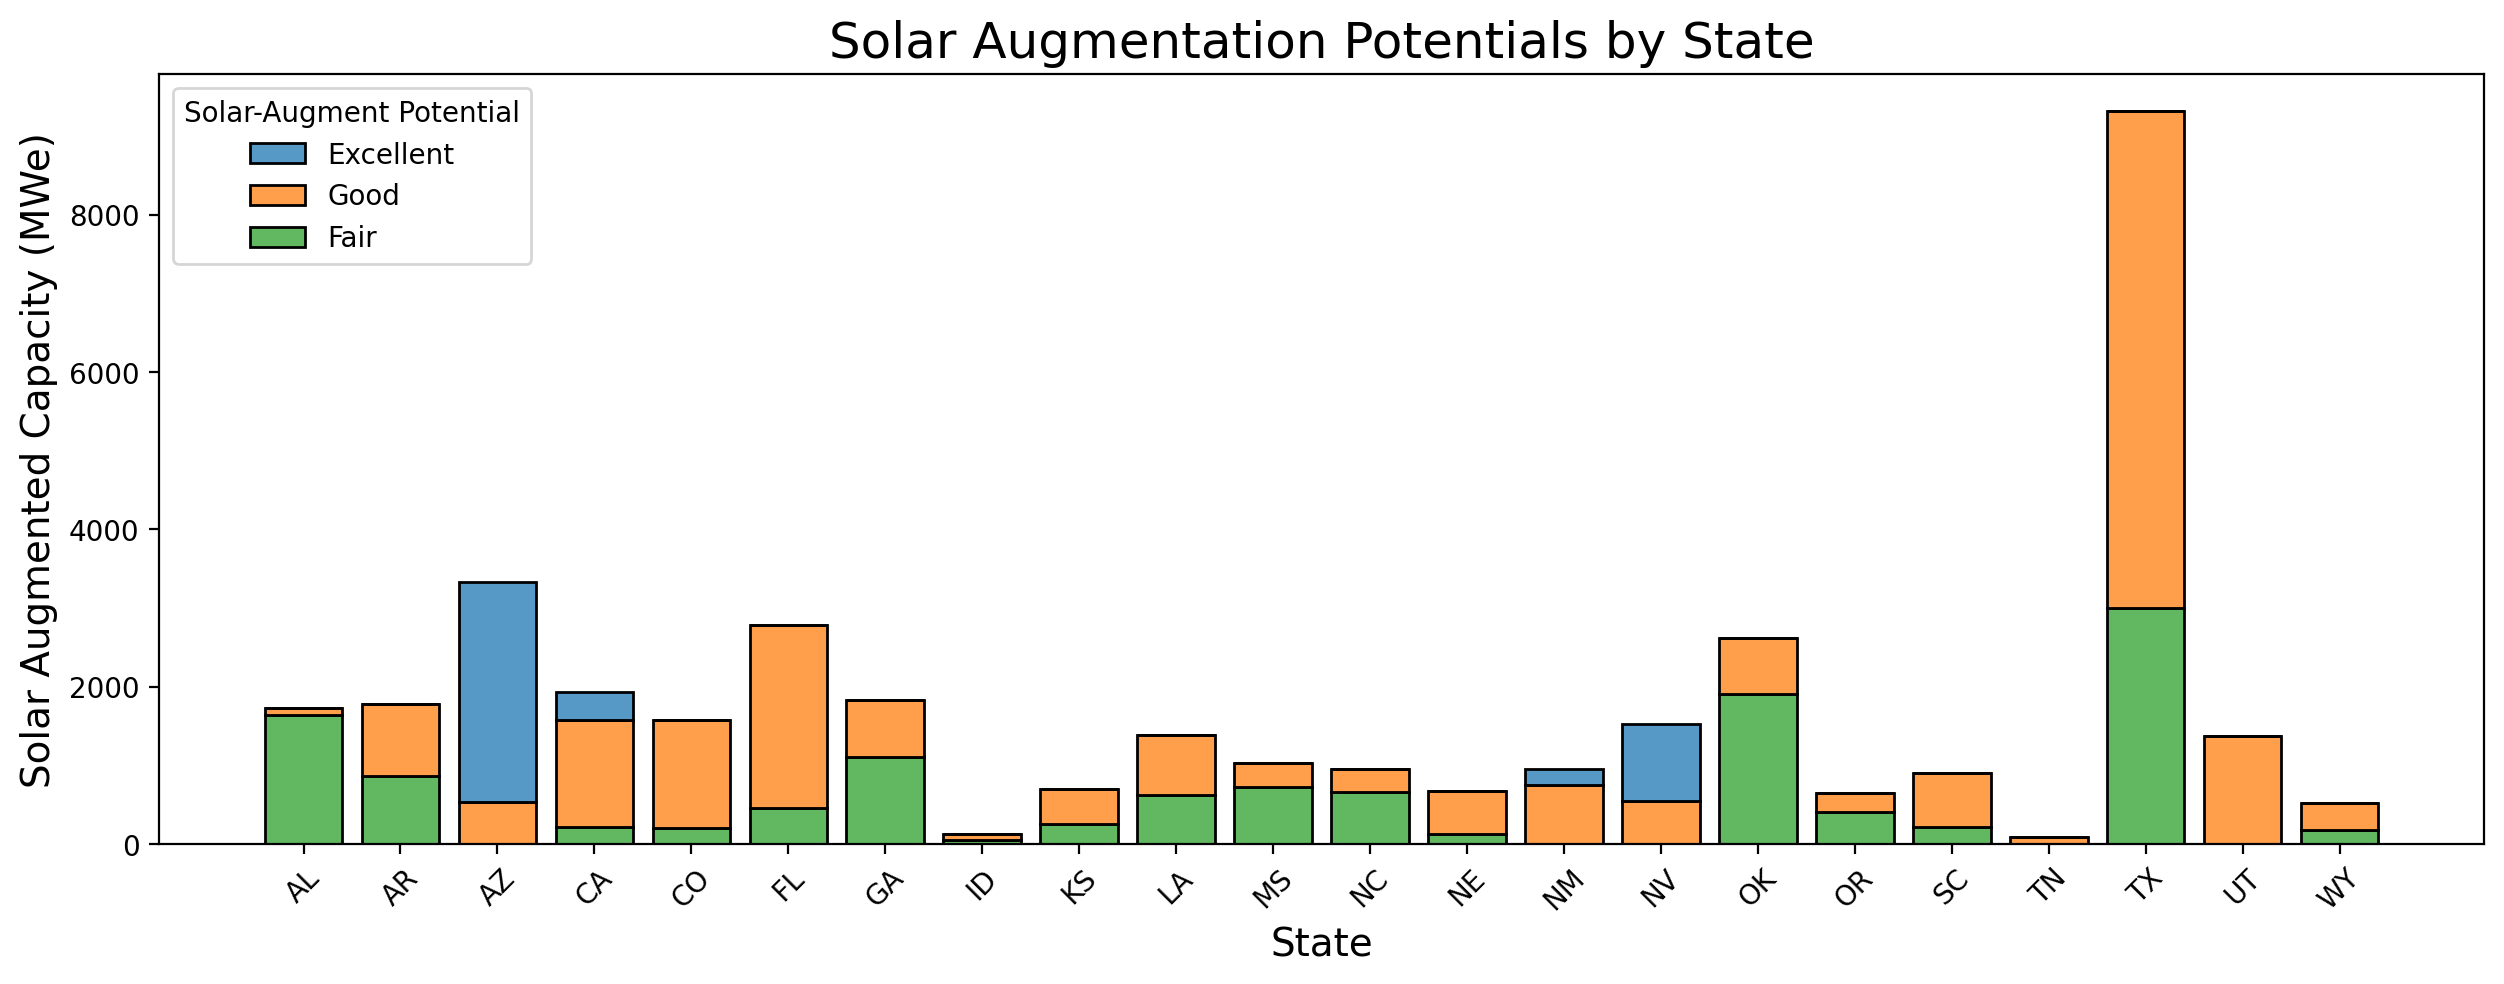

In [38]:
# Plot stacked bar chart using histplot by State for all source types

# Define the desired order for categories
augment_order = ["Excellent", "Good", "Fair"]

plt.figure(figsize=(15,5))

sns.histplot(
    data=melted_plants, 
    x='State', 
    hue='Solar-Augment Potential', 
    hue_order=augment_order,
    weights='Augmented Capacity (MWe)',  # Use weights for aggregation
    multiple='stack', 
    shrink=0.8
)

plt.xlabel('State', size=14)
plt.ylabel('Solar Augmented Capacity (MWe)', size=14)
plt.title('Solar Augmentation Potentials by State', size=18)
plt.xticks(rotation=45)
plt.show();

Looking at solar augmnetation potential by state, it is informative to generate a staked bar chart for the total augmneted capacities in the different states, color-coded by potential rank.

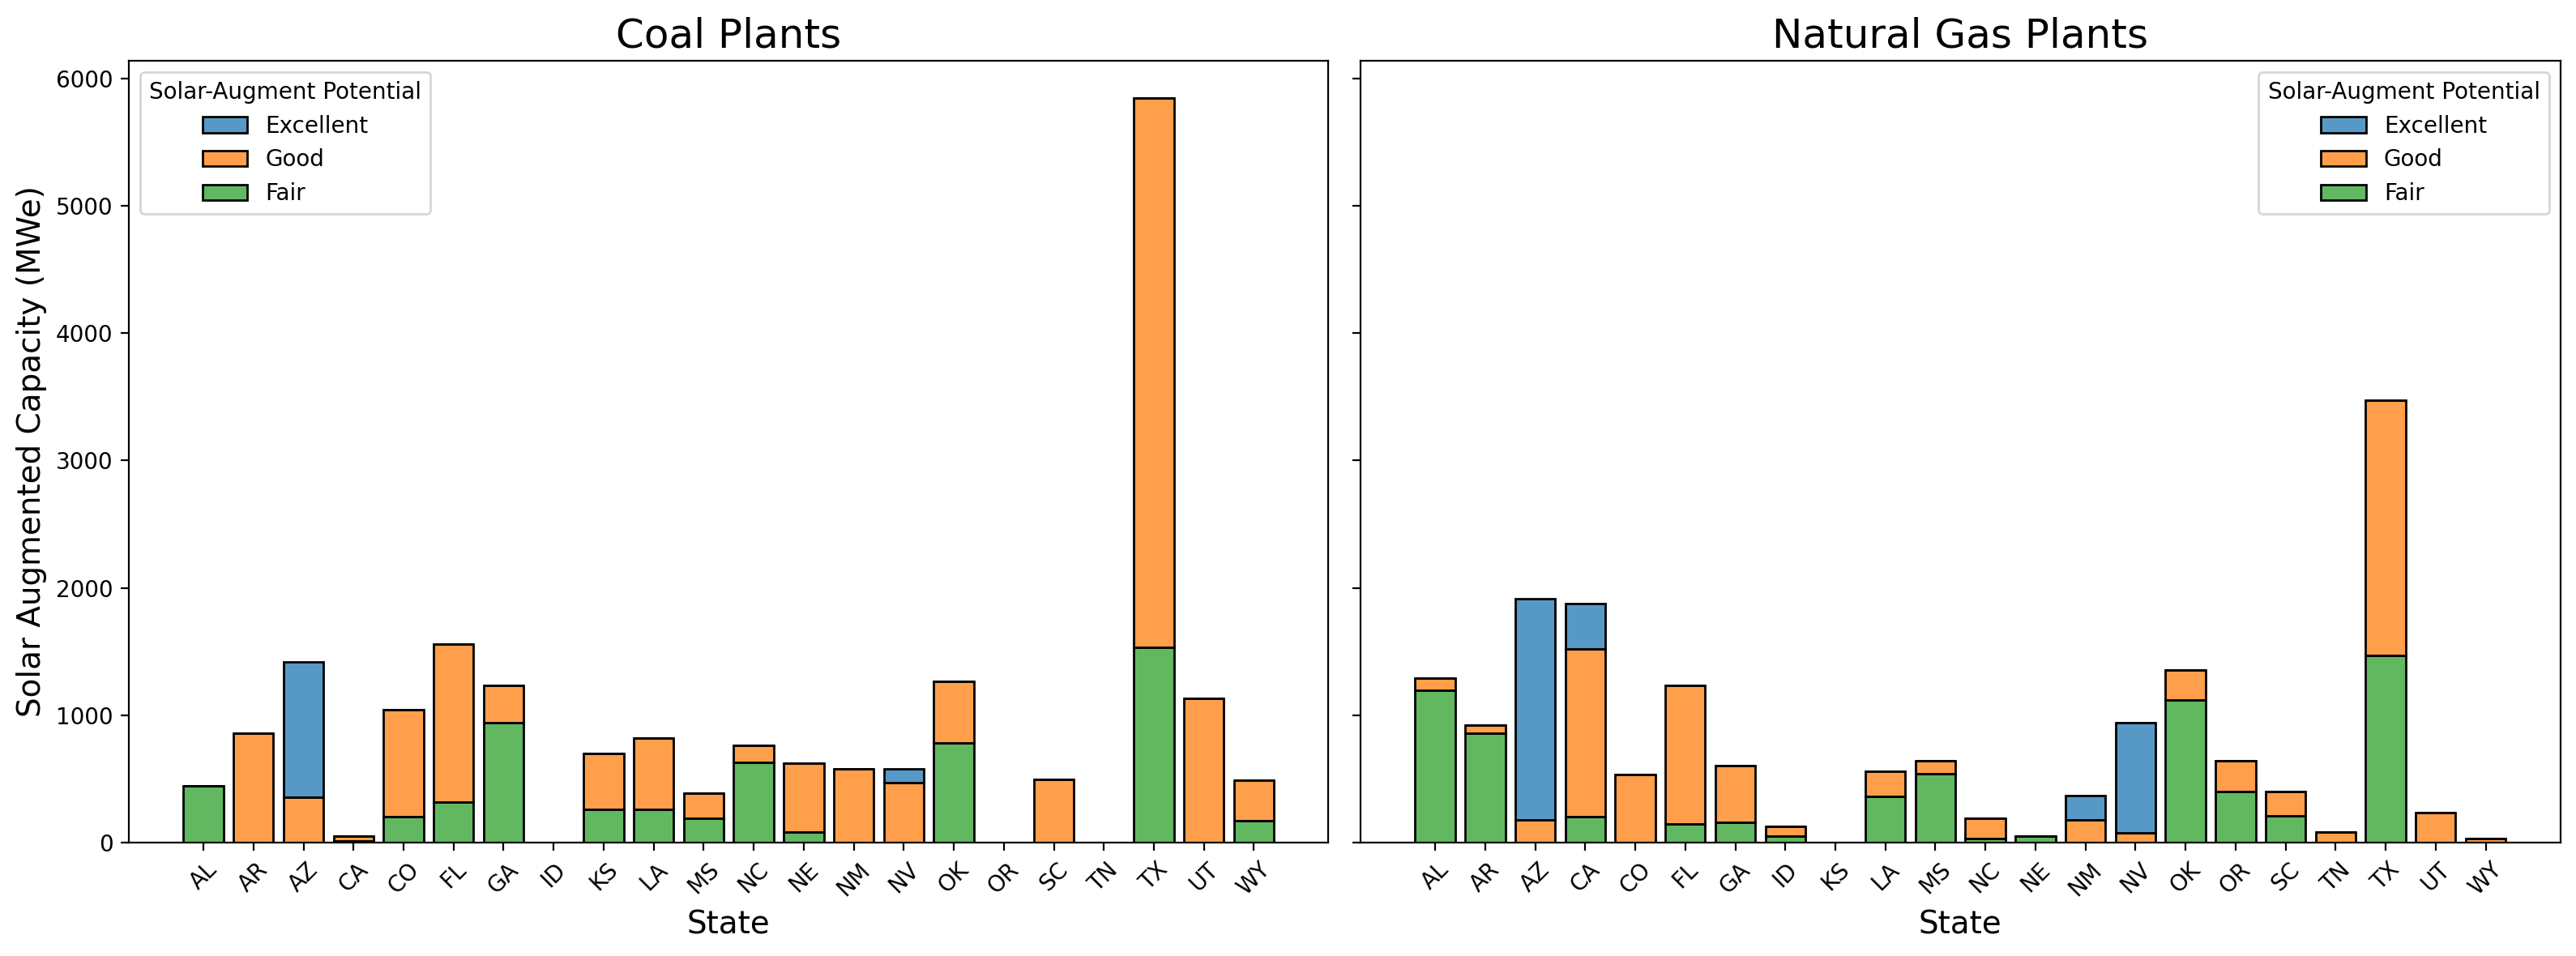

In [39]:
# Plot stacked bar chart using histplot by State distinguishing source types

# Define the desired order for categories
augment_order = ["Excellent", "Good", "Fair"]

# Custom color palette for Solar-Augment Potential categories
custom_palette = "tab10"

# Function to plot stacked bars for given plant type
def plot_stacked_chart(plant_type, ax):
    subset = melted_plants[melted_plants['Type'] == plant_type]
    sns.histplot(
        data=subset, 
        x='State', 
        hue='Solar-Augment Potential', 
        hue_order=augment_order,
        weights='Augmented Capacity (MWe)',
        multiple='stack', 
        shrink=0.8, 
        palette=custom_palette,
        edgecolor='black',
        ax=ax
    )
    ax.set_xlabel('State', size=14)
    ax.set_ylabel('Solar Augmented Capacity (MWe)', size=14)
    ax.set_title(f'{plant_type} Plants', size=18)
    ax.tick_params(axis='x', rotation=45)

# Create separate plots for Coal and Natural Gas
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

plot_stacked_chart('Coal', axes[0])
plot_stacked_chart('Natural Gas', axes[1])

plt.tight_layout()
plt.show()

Here I separate the augmentation potential by source type, which makes the plots more informative: e.g., there is more excellent augmentation potential for natural gas than for coal in Arizona, but more good potential for coal than gas in Texas. This could help inform stakeholders regarding of which plants to invest in by State.

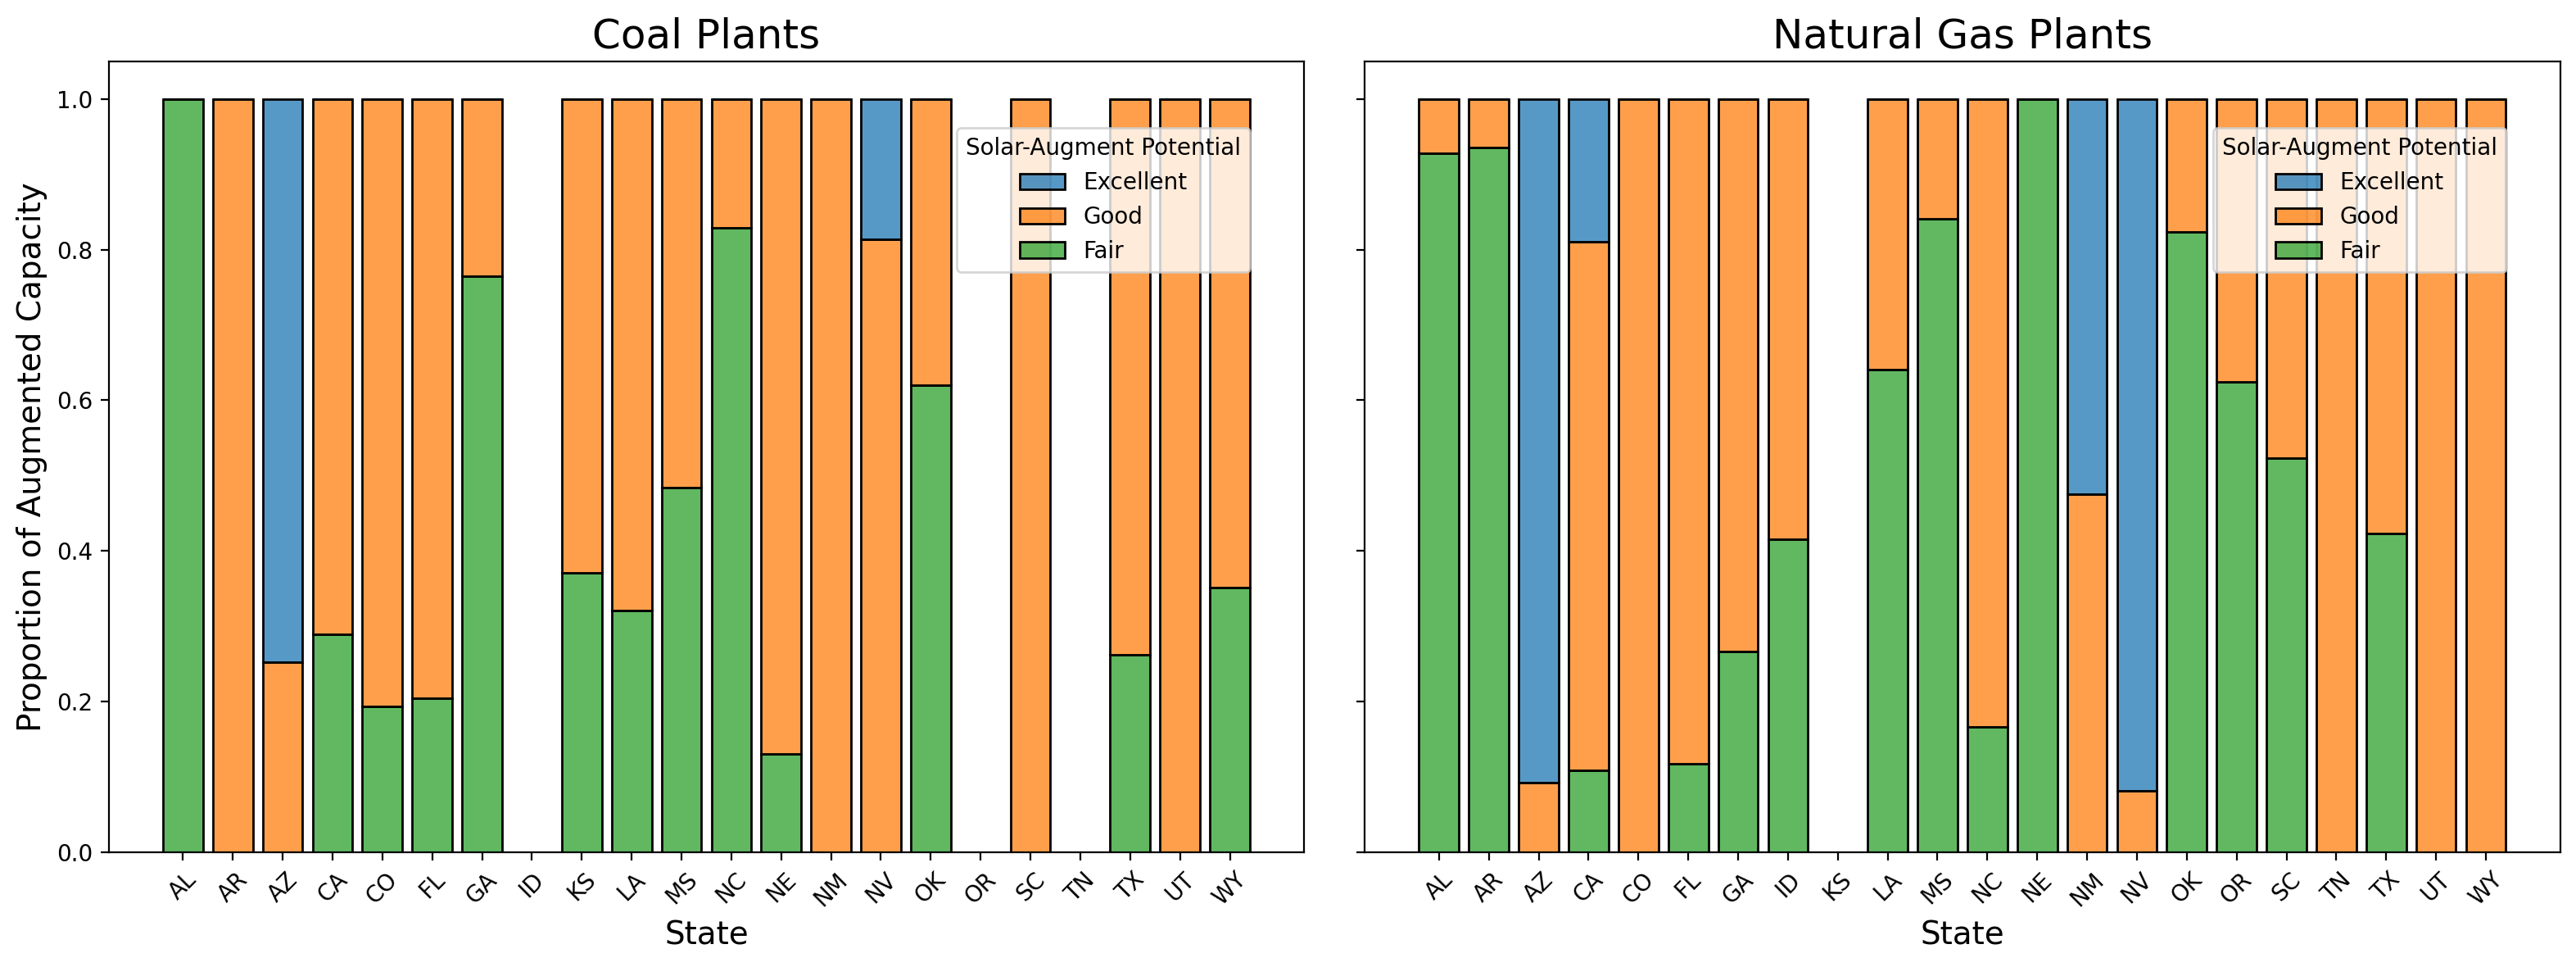

In [40]:
# Define the desired order for categories
augment_order = ["Excellent", "Good", "Fair"]

# Custom color palette for Solar-Augment Potential categories
custom_palette = "tab10"

# Function to plot normalized stacked bars for a given plant type
def plot_normalized_stacked_chart(plant_type, ax):
    subset = melted_plants[melted_plants['Type'] == plant_type].copy()
    
    # Normalize the Augmented Capacity within each state
    subset['Normalized Capacity'] = subset.groupby('State',observed=True)['Augmented Capacity (MWe)'].transform(lambda x: x / x.sum())

    sns.histplot(
        data=subset, 
        x='State', 
        hue='Solar-Augment Potential', 
        hue_order=augment_order,
        weights='Normalized Capacity',  # Normalized values per state
        multiple='stack', 
        shrink=0.8, 
        palette=custom_palette,
        edgecolor='black',
        ax=ax
    )

    ax.set_xlabel('State', size=14)
    ax.set_ylabel('Proportion of Augmented Capacity', size=14)
    ax.set_title(f'{plant_type} Plants', size=18)
    ax.tick_params(axis='x', rotation=45)

    # Get legend and reposition it
    legend = ax.get_legend()
    if legend:
        legend.set_title('Solar-Augment Potential')
        legend.set_bbox_to_anchor((0.7, 0.93))  # Granularly adjusted to place inside the plot
        legend.set_frame_on(True)

# Create separate plots for Coal and Natural Gas
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

plot_normalized_stacked_chart('Coal', axes[0])
plot_normalized_stacked_chart('Natural Gas', axes[1])

plt.tight_layout()
plt.show()

Normalizing the augmented capacity by the number of observations returns a cleaner visual of the proportions of the different augmentation potentials for each state and for each fuel type. Howevr, information on the actual state plants capacities in (MWe) is lost.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The best correlations that came about is between the different solar augmentation technologies separated by fossil fuel type, clearly informing which technology and fuel have the best potential irrespective of the ranking of the plants.

### Were there any interesting or surprising interactions between features?

States like Arizona and Texas truly stood out for solar enhancement potential of different plants, similar for the fossil fuel types, but the analyes conducted are cumulative and do not consider the number of plants in those states.

## Conclusions
After merging and cleaning the data, a number of useful observations can be made:
- there are more natural gas plants than coal plants in the study;
- natural gas plants have a bimodal distribution of capacity;
- coal plants have a unimodal distribution of capacity, and reach higher capacities overall;
- power tower is a more effective solar enhancement technology than parabolic trough (as also concluded by the original study);
- the two augmentation technologies correlate strongly with fossil fuel type;
- coal plants yiel the most solar augmentation compared to natural gas plants;
- certain states stand out in terms of solar enhancement potential:
     - Arizona has the most Excellent augmentation potential, yet not necessarily in terms of total augmented capacity;
     - Texas has the largest total augmentation potential capacity, but the plantsthere rank lower (Good and Fair);
- considering that from the initial study, solar augmentation has the largest pollution control benefits on coal plants and the overall larger augmented capacity of coal plants, it makes sense to invest in augmenting these plants, including those that rank Good and Fair but produce large volumes of power. On the other hand, both coal and natural gas plants that scored Excellent augmentation potential should be "invested on", with Arizona being the poster-child state for it.

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

